# Exploring Supernatural Evil Beliefs

Assignment 2

---

> Odyssefs Diamantopoulos Pantaleon, Undergraduate Student <br />
> Department of Computer Science<br />
> Athens University of Economics and Business <br />
> p3180049@aueb.gr

## Q1: Belief in Supernatural Evil Metric

In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

### 1.1 Obtain the Data

> I downloaded the data from https://www.thearda.com/Archive/Files/Downloads/BRS2014_DL2.asp just like instructed on the paper

> This is the Wave 4 dataset

In [302]:
data = pd.read_csv("BaylorReligionSurvey.csv") #import the data

In [303]:
data

,MOTHERLODE_ID,PROJECT_ID,RESPONDENT_ID,METHOD_ID,METHOD_TYPE,PROJECT_NUMBER,CREATED_ON,PRACTICE,RESPONDENT_DATE,RESPONDENT_LANGUAGE,...,STATE,PROJWT,WEIGHT,Q2,RELTRAD,I_GENDER,I_EDUC,I_MARITAL,I_RELIGION,I_ATTEND
0,128170892,33370,01_000001_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,TX,20086.69661,0.270000,Church of Christ,1.0,2.0,5.0,3.0,1.0,6.0
1,128170893,33370,01_000002_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,TX,26218.57317,0.352423,Church of God In Christ,3.0,2.0,3.0,3.0,3.0,2.0
2,128170894,33370,01_000003_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,ND,41408.88989,0.556608,ELCA,2.0,2.0,3.0,1.0,2.0,6.0
3,128170895,33370,01_000004_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,TX,50023.02736,0.672397,Independent Methodist,2.0,2.0,4.0,3.0,2.0,5.0
4,128170896,33370,01_000005_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,IA,230734.42840,3.101474,Don't have specific name,1.0,1.0,2.0,2.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,128172920,33371,02_000301_00000013,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/10/2014,es-AR,...,CA,17054.91266,0.229248,NaN,4.0,2.0,5.0,2.0,4.0,2.0
1568,128172921,33371,02_000326_00000014,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/12/2014,es-AR,...,CA,104454.33680,1.404049,NaN,4.0,2.0,2.0,2.0,4.0,1.0
1569,128172922,33371,02_000351_00000015,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/19/2014,es-AR,...,CA,153453.64200,2.062685,NaN,6.0,2.0,3.0,1.0,5.0,6.0
1570,128172335,33371,02_000352_00000015,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/19/2014,es-AR,...,CT,33324.20001,0.447935,Catolica Romana - Latinos,4.0,1.0,5.0,2.0,4.0,3.0


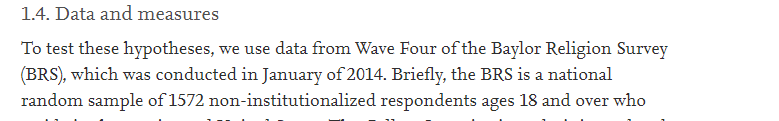

>We have 1572 rows in the dataset, just like the paper informs us, so we can be sure we downloaded the correct one

### 1.2 Obtain the Data

> I have to isolate only the 3 questions that are needed.

> According to the txt file in the path these are the Q23 A(Devil), C(Hell) and G(Demons)

In [304]:
q1data = data[['MOTHERLODE_ID','Q23A','Q23C','Q23G']].copy()

> These are the possible answers to the four questions

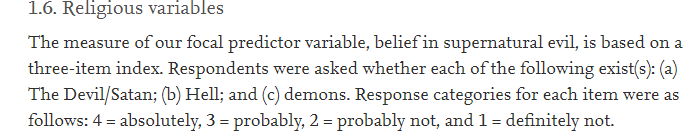

In [305]:
q1data

,MOTHERLODE_ID,Q23A,Q23C,Q23G
0,128170892,4.0,4.0,4.0
1,128170893,4.0,4.0,4.0
2,128170894,3.0,2.0,2.0
3,128170895,4.0,4.0,4.0
4,128170896,4.0,4.0,4.0
...,...,...,...,...
1567,128172920,4.0,2.0,4.0
1568,128172921,3.0,3.0,3.0
1569,128172922,4.0,4.0,3.0
1570,128172335,3.0,3.0,3.0


> In order to combine these three questions in one metric, we just need to get the average of those questions and this average will determine how much the subject believes in supernatural evil

>This is based on what the paper says in this text:

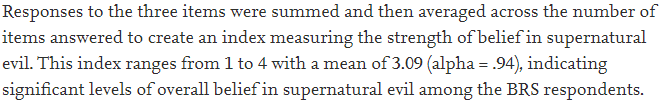

In [306]:
q1data['SupernaturalEvil'] = (q1data['Q23A'] + q1data['Q23C'] + q1data['Q23G'])/3

In [307]:
q1data

,MOTHERLODE_ID,Q23A,Q23C,Q23G,SupernaturalEvil
0,128170892,4.0,4.0,4.0,4.000000
1,128170893,4.0,4.0,4.0,4.000000
2,128170894,3.0,2.0,2.0,2.333333
3,128170895,4.0,4.0,4.0,4.000000
4,128170896,4.0,4.0,4.0,4.000000
...,...,...,...,...,...
1567,128172920,4.0,2.0,4.0,3.333333
1568,128172921,3.0,3.0,3.0,3.000000
1569,128172922,4.0,4.0,3.0,3.666667
1570,128172335,3.0,3.0,3.0,3.000000


> The mean of questions is 3.08 just like what the paper says

In [308]:
q1data.describe()

,MOTHERLODE_ID,Q23A,Q23C,Q23G,SupernaturalEvil
count,1.572000e+03,1504.000000,1499.000000,1492.000000,1474.000000
mean,1.281718e+08,3.149601,3.088726,3.016086,3.080280
std,5.894006e+02,1.108048,1.114655,1.108353,1.056362
min,1.281709e+08,1.000000,1.000000,1.000000,1.000000
25%,1.281713e+08,2.000000,2.000000,2.000000,2.333333
50%,1.281717e+08,4.000000,4.000000,3.000000,3.666667
75%,1.281722e+08,4.000000,4.000000,4.000000,4.000000
max,1.281729e+08,4.000000,4.000000,4.000000,4.000000


> Lets find their factor loading to see how much the correlate

In [309]:
temp = q1data[["Q23A","Q23C","Q23G","SupernaturalEvil"]].corr()

In [310]:
temp

,Q23A,Q23C,Q23G,SupernaturalEvil
Q23A,1.000000,0.885823,0.857858,0.963403
Q23C,0.885823,1.000000,0.813177,0.947701
Q23G,0.857858,0.813177,1.000000,0.937439
SupernaturalEvil,0.963403,0.947701,0.937439,1.000000


> This is also shown in the paper

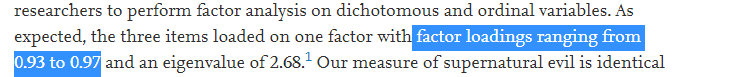

In [311]:
q1data.isna().sum()

MOTHERLODE_ID        0
Q23A                68
Q23C                73
Q23G                80
SupernaturalEvil    98
dtype: int64

In [312]:
#q1data.dropna(inplace=True)

In [313]:
#q1data.isna().sum()

In [314]:
q1data.sort_values(by='MOTHERLODE_ID', inplace=True)

In [315]:
q1data.reset_index(drop=True, inplace=True)

In [316]:
q1data.head()

,MOTHERLODE_ID,Q23A,Q23C,Q23G,SupernaturalEvil
0,128170892,4.0,4.0,4.0,4.000000
1,128170893,4.0,4.0,4.0,4.000000
2,128170894,3.0,2.0,2.0,2.333333
3,128170895,4.0,4.0,4.0,4.000000
4,128170896,4.0,4.0,4.0,4.000000


## Q2: Variables Selection

> I will calculate the mean for each variable

> I will only calculate the standard deviation for variables where the answer is not binary(yes or no).

> In this dataset we will put all the dependent variable questions

In [317]:
q2datadependent=data[['Q73A','Q73E','Q73G','Q73H','Q73C','Q73F','Q73B','Q73D']].copy()

In [318]:
q2datadependent

,Q73A,Q73E,Q73G,Q73H,Q73C,Q73F,Q73B,Q73D
0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0
3,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
4,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
1567,NaN,1.0,NaN,2.0,1.0,NaN,NaN,1.0
1568,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0
1569,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0
1570,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0


> As we know from the research, the possible answers are 1 for favor and 2 for oppose.

> In order to make it just like the appendix, we are going to subtract 1 for every answer so the range is modified to 0 for favor and 1 for oppose

In [319]:
q2datadependent =q2datadependent.sub(1)

In [320]:
q2datadependent.describe()

,Q73A,Q73E,Q73G,Q73H,Q73C,Q73F,Q73B,Q73D
count,1502.000000,1502.000000,1501.000000,1502.000000,1510.000000,1504.000000,1515.000000,1512.000000
mean,0.370839,0.328895,0.709527,0.442077,0.378146,0.705452,0.072607,0.091931
std,0.483190,0.469968,0.454132,0.496799,0.485085,0.455991,0.259576,0.289024
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> I am going to get the mean of the Dependent values and store it in its own dataframe

In [321]:
q2dependent = q2datadependent.describe(include='all').loc['mean']

In [322]:
q2dependent

Q73A    0.370839
Q73E    0.328895
Q73G    0.709527
Q73H    0.442077
Q73C    0.378146
Q73F    0.705452
Q73B    0.072607
Q73D    0.091931
Name: mean, dtype: float64

> In order to show it just like the paper I have to subtract the means from 1 in order to get the percentage of in favor answers.

In [323]:
q2dependent = 1 - q2dependent

In [324]:
q2dependent

Q73A    0.629161
Q73E    0.671105
Q73G    0.290473
Q73H    0.557923
Q73C    0.621854
Q73F    0.294548
Q73B    0.927393
Q73D    0.908069
Name: mean, dtype: float64

> I will also store the mean and the standard deviation for each variable in a different dataframe

In [325]:
q2variables = [['BanSemiAutoWeapons', '0-1', 0.629161,0], ['ExpandedGunPrograms','0-1',0.927393,0], ['SecurityGuardSchools', '0-1',0.621854,0], ['BetterMentalHealth','0-1', 0.908069,0], ['BanHighClips','0-1',0.671105,0], ['MoreGunsSchools','0-1', 0.294548,0], ['BanHandGuns', '0-1',0.290473,0], ['ConceledGuns', '0-1',0.557923,0]]

In [326]:
q2variables = pd.DataFrame(q2variables, columns = ['Variables', 'Range','Mean','Std'])

In [327]:
#q2variables.rename(columns = {'Q73A':'BanSemiAutoWeapons' , 'Q73B':'ExpandedGunPrograms', 'Q73C': 'SecurityGuardSchools', 'Q73D': 'BetterMentalHealth','Q73E':'BanHighClips','Q73F':'MoreGunsSchools', 'Q73G':'BanHandGuns','Q73H':'ConceledGuns'})

In [328]:
q2variables

,Variables,Range,Mean,Std
0,BanSemiAutoWeapons,0-1,0.629161,0
1,ExpandedGunPrograms,0-1,0.927393,0
2,SecurityGuardSchools,0-1,0.621854,0
3,BetterMentalHealth,0-1,0.908069,0
4,BanHighClips,0-1,0.671105,0
5,MoreGunsSchools,0-1,0.294548,0
6,BanHandGuns,0-1,0.290473,0
7,ConceledGuns,0-1,0.557923,0


> Here I am going to get the mean and the standard deviation of the focal variable which is Supernatural Evil and store it in another dataframe

In [329]:
q2focal = q1data['SupernaturalEvil']

In [330]:
q2focal = q2focal.describe(include='all').loc[['mean','std']]

In [331]:
q2focal

mean    3.080280
std     1.056362
Name: SupernaturalEvil, dtype: float64

In [332]:
q2f = pd.DataFrame([['Supernatural Evil','1-4', 3.080280,1.056362]],columns = ['Variables', 'Range','Mean','Std'])

In [333]:
q2variables = q2variables.append(q2f,ignore_index=True)

In [334]:
q2variables

,Variables,Range,Mean,Std
0,BanSemiAutoWeapons,0-1,0.629161,0.000000
1,ExpandedGunPrograms,0-1,0.927393,0.000000
2,SecurityGuardSchools,0-1,0.621854,0.000000
3,BetterMentalHealth,0-1,0.908069,0.000000
4,BanHighClips,0-1,0.671105,0.000000
5,MoreGunsSchools,0-1,0.294548,0.000000
6,BanHandGuns,0-1,0.290473,0.000000
7,ConceledGuns,0-1,0.557923,0.000000
8,Supernatural Evil,1-4,3.080280,1.056362


> Here I am going to get the mean and the standard deviation of the Religion variables and store it in another dataframe

In [335]:
q2datareligion=data[['Q4','Q17']].copy()

> The problem is that Q17 contains information about the Bible (Human Error, History and Fables),	Biblical Inerrancy and Biblical Literalism variables. 

> I will break Q17 answers in order to get the variables:

        -If the answer is 1 then I will assign it to the Q17A( Biblical Literalism)
        
        -If the answer is 2  then I will assign it to the Q17B( Biblical Inerrancy)
        
        -If the answer is 3,4 or 8 then I will assign it to the Q17C( Bible (Human Error, History and Fables))
        
        -I hypothesise that the 8 value of "I dont know" counts as that the Bible may not be true, therefore counts as the third option

In [336]:
q2datareligion['Q17'] = q2datareligion['Q17'].map({1:'literalism', 2:'inerrancy',3:'HumanErrorHistoryandFables',4:'HumanErrorHistoryandFables',8:'HumanErrorHistoryandFables'})

In [337]:
religiondata = pd.get_dummies(q2datareligion)

In [338]:
religiondata

,Q4,Q17_HumanErrorHistoryandFables,Q17_inerrancy,Q17_literalism
0,8.0,0,0,1
1,1.0,0,0,1
2,7.0,0,1,0
3,6.0,0,1,0
4,8.0,0,0,1
...,...,...,...,...
1567,1.0,0,0,1
1568,0.0,0,1,0
1569,7.0,0,1,0
1570,3.0,0,1,0


In [339]:
attendance = religiondata['Q4'].describe(include='all').loc[['mean','std']]

In [340]:
attendance

mean    3.676735
std     2.932510
Name: Q4, dtype: float64

In [341]:
inerrancy = religiondata['Q17_inerrancy'].describe(include='all').loc['mean']

In [342]:
inerrancy

0.3333333333333333

In [343]:
literalism = religiondata['Q17_literalism'].describe(include='all').loc['mean']

In [344]:
literalism

0.22582697201017812

In [345]:
humanerror = religiondata['Q17_HumanErrorHistoryandFables'].describe(include='all').loc['mean']

In [346]:
humanerror

0.4262086513994911

In [347]:
q2att = pd.DataFrame([['Attendance','0-8', 3.676735,2.932510],['Inerrancy','0-1', inerrancy,0],['Literalism','0-1', literalism,0],['Humanerror','0-1',humanerror,0]],columns = ['Variables', 'Range','Mean','Std'])

In [348]:
q2variables = q2variables.append(q2att,ignore_index=True)

In [349]:
q2variables

,Variables,Range,Mean,Std
0,BanSemiAutoWeapons,0-1,0.629161,0.000000
1,ExpandedGunPrograms,0-1,0.927393,0.000000
2,SecurityGuardSchools,0-1,0.621854,0.000000
3,BetterMentalHealth,0-1,0.908069,0.000000
4,BanHighClips,0-1,0.671105,0.000000
5,MoreGunsSchools,0-1,0.294548,0.000000
6,BanHandGuns,0-1,0.290473,0.000000
7,ConceledGuns,0-1,0.557923,0.000000
8,Supernatural Evil,1-4,3.080280,1.056362
9,Attendance,0-8,3.676735,2.932510


> I will now examine Religious Affiliation

In [350]:
q2dataaff=data['RELTRAD'].copy()

In [351]:
q2dataaff

0       1.0
1       3.0
2       2.0
3       2.0
4       1.0
       ... 
1567    4.0
1568    4.0
1569    6.0
1570    4.0
1571    4.0
Name: RELTRAD, Length: 1572, dtype: float64

> In the appendix there is no Jewish value, so I am going to include it in the other category since being Jewish means having an affiliation

In [352]:
q2dataaff = q2dataaff.map({1:'conservatist/evangelical', 2:'mainline',3:'black',4:'catholic',5:'other',6:'other',7:'noaff'})

In [353]:
affdata = pd.get_dummies(q2dataaff)

In [354]:
consevan = affdata['conservatist/evangelical'].describe(include='all').loc['mean']
consevan

0.2678117048346056

In [355]:
mainline = affdata['mainline'].describe(include='all').loc['mean']
mainline

0.15903307888040713

In [356]:
black = affdata['black'].describe(include='all').loc['mean']
black

0.06743002544529263

In [357]:
catholic = affdata['catholic'].describe(include='all').loc['mean']
catholic

0.23473282442748092

In [358]:
other = affdata['other'].describe(include='all').loc['mean']
other

0.07697201017811704

> Makes sense since Jewish in the data is 2.2 and other is 5.9, 2.2 + 5.9 = 8.1

In [359]:
noaff = affdata['noaff'].describe(include='all').loc['mean']
noaff

0.1361323155216285

In [360]:
q2affi = pd.DataFrame([['Conservatist/Evangelical','0-1', consevan,0],['Mainline','0-1', mainline,0],['BlackProtenstant','0-1', black,0],['Catholic','0-1',catholic,0],['Other','0-1',other,0]],columns = ['Variables', 'Range','Mean','Std'])

In [361]:
q2variables = q2variables.append(q2affi,ignore_index=True)

In [362]:
q2variables

,Variables,Range,Mean,Std
0,BanSemiAutoWeapons,0-1,0.629161,0.000000
1,ExpandedGunPrograms,0-1,0.927393,0.000000
2,SecurityGuardSchools,0-1,0.621854,0.000000
3,BetterMentalHealth,0-1,0.908069,0.000000
4,BanHighClips,0-1,0.671105,0.000000
5,MoreGunsSchools,0-1,0.294548,0.000000
6,BanHandGuns,0-1,0.290473,0.000000
7,ConceledGuns,0-1,0.557923,0.000000
8,Supernatural Evil,1-4,3.080280,1.056362
9,Attendance,0-8,3.676735,2.932510


> Next we are moving to the Mediator, which is Political Ideology

In [363]:
q2politics=data['Q32'].copy()

In [364]:
q2politics

0       4.0
1       7.0
2       7.0
3       2.0
4       NaN
       ... 
1567    6.0
1568    7.0
1569    6.0
1570    7.0
1571    NaN
Name: Q32, Length: 1572, dtype: float64

In [365]:
q2politics.describe()

count    1521.000000
mean        4.284024
std         1.841642
min         1.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         7.000000
Name: Q32, dtype: float64

In [366]:
q2pol = pd.DataFrame([['Political Ideology','1-7', 4.284024,1.841642]],columns = ['Variables', 'Range','Mean','Std'])

In [367]:
q2variables = q2variables.append(q2pol,ignore_index=True)

In [368]:
q2variables

,Variables,Range,Mean,Std
0,BanSemiAutoWeapons,0-1,0.629161,0.000000
1,ExpandedGunPrograms,0-1,0.927393,0.000000
2,SecurityGuardSchools,0-1,0.621854,0.000000
3,BetterMentalHealth,0-1,0.908069,0.000000
4,BanHighClips,0-1,0.671105,0.000000
5,MoreGunsSchools,0-1,0.294548,0.000000
6,BanHandGuns,0-1,0.290473,0.000000
7,ConceledGuns,0-1,0.557923,0.000000
8,Supernatural Evil,1-4,3.080280,1.056362
9,Attendance,0-8,3.676735,2.932510


> Here we will examine the control variables

In [369]:
q2control=data[['MOTHERLODE_ID','AGE','Q77','Q88A','Q89','Q88B','Q88F','Q88C','Q88D','Q88E','Q90','Q95','Q51A','Q93','Q93_NONE','Q80','Q32',]].copy()

In [370]:
q2control

,MOTHERLODE_ID,AGE,Q77,Q88A,Q89,Q88B,Q88F,Q88C,Q88D,Q88E,Q90,Q95,Q51A,Q93,Q93_NONE,Q80,Q32
0,128170892,85,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,6.0,2.0,5.0,NaN,1.0,4.0,4.0
1,128170893,0,2.0,2.0,NaN,1.0,NaN,2.0,2.0,2.0,4.0,1.0,5.0,2.0,NaN,1.0,7.0
2,128170894,67,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,3.0,1.0,NaN,NaN,3.0,7.0
3,128170895,64,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,5.0,2.0,5.0,NaN,NaN,2.0,2.0
4,128170896,54,1.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,3.0,5.0,2.0,2.0,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,128172920,48,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,6.0,5.0,2.0,NaN,1.0,3.0,6.0
1568,128172921,59,2.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,3.0,4.0,2.0,1.0,NaN,1.0,7.0
1569,128172922,29,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,1.0,NaN,NaN,3.0,6.0
1570,128172335,57,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,6.0,5.0,3.0,0.0,1.0,1.0,7.0


> Here I will examine the Gender and map accordingly

In [371]:
q2control['Male'] = q2control['Q77'].map({1:1,2:0})

In [372]:
q2control['Female'] = q2control['Q77'].map({1:0,2:1})

In [373]:
q2control.drop(columns = 'Q77',inplace=True)

> I will map the answers as White if it is 1 or NotWhite if it is 2


In [374]:
q2control['White'] = q2control['Q88A'].map({1:'White',2:'NotWhite'})

In [375]:
white = pd.get_dummies(q2control['White'])

In [376]:
white.describe()

,NotWhite,White
count,1572.000000,1572.000000
mean,0.082697,0.746183
std,0.275512,0.435332
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [377]:
q2control.drop(columns = 'Q88A',inplace=True)

> I will map non hispanic to non hispanic and all other hispanic races to Hispanic

In [378]:
q2control['Hispanic'] = q2control['Q89'].map({1:"NonHispanic", 2:'Hispanic',3:'Hispanic',4:'Hispanic',5:'Hispanic',8:"NonHispanic"})

In [379]:
hispanic = pd.get_dummies(q2control['Hispanic'])

In [380]:
hispanic.describe()

,Hispanic,NonHispanic
count,1572.000000,1572.000000
mean,0.111323,0.465013
std,0.314632,0.498933
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [381]:
q2control.drop(columns = 'Q89',inplace=True)

> I will map the answers as Black if it is 1 or NotBlack if it is 2

In [382]:
q2control['Black'] = q2control['Q88B'].map({1:'Black',2:'NotBlack'})

In [383]:
black = pd.get_dummies(q2control['Black'])

In [384]:
black.describe()

,Black,NotBlack
count,1572.000000,1572.000000
mean,0.113868,0.409033
std,0.317752,0.491812
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [385]:
q2control.drop(columns = 'Q88B',inplace=True)

> I will now explore Other races

> In the appendix of the paper I see that there are only black, white and other races and if we add up the percentages it goes up to 1

> That means that in other I have to include Hawaians/Pacific Islanders, Asians and American Indians/Alaska Natives.

In [386]:
q2control['Indian/Alaska'] = q2control['Q88C'].map({1:'Indian',2:'NonIndian'})

In [387]:
q2control['Asian'] = q2control['Q88D'].map({1:'Asian',2:'NotAsian'})

In [388]:
q2control['Hawaian/Pacific'] = q2control['Q88E'].map({1:'Hawaian',2:'NonHawaian'})

In [389]:
q2control['Other'] = q2control['Q88F'].map({1:'Other',2:'NotOther'})

In [390]:
dfother = pd.get_dummies(q2control[['Indian/Alaska','Asian','Hawaian/Pacific','Other']])

In [391]:
dfother.describe()

,Indian/Alaska_Indian,Indian/Alaska_NonIndian,Asian_Asian,Asian_NotAsian,Hawaian/Pacific_Hawaian,Hawaian/Pacific_NonHawaian,Other_NotOther,Other_Other
count,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000
mean,0.018448,0.440840,0.021628,0.442748,0.002545,0.452290,0.390585,0.036896
std,0.134607,0.496646,0.145513,0.496869,0.050395,0.497877,0.488037,0.188566
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [392]:
other_mean = dfother['Indian/Alaska_Indian'].mean() + dfother['Asian_Asian'].mean() + dfother['Hawaian/Pacific_Hawaian'].mean() + dfother['Other_Other'].mean()

In [393]:
other_mean

0.07951653944020357

In [394]:
q2control.drop(columns = 'Q88F',inplace=True)

In [395]:
q2control.drop(columns = 'Q88C',inplace=True)

In [396]:
q2control.drop(columns = 'Q88D',inplace=True)

In [397]:
q2control.drop(columns = 'Q88E',inplace=True)

> I dont need to do anything about Household income, I will just change column name

In [398]:
q2control.rename(columns={'Q95': 'HouseholdIncome'},inplace=True)

> I am going to map 8th grade or less and 9th-12th grade as LessThanHighschool, Highschool graduates as Highschool, College and Vocational Training as College, CollegeGraduate as CollegeDegree and PostGraduateDegree as PostGraduates.

In [399]:
q2control['Q90'] = q2control['Q90'].map({1:'LessThanHighschool', 2:'LessThanHighschool',3:'Highschool',4:'College',5:'College',6:'CollegeDegree',7:"Postgraduate"})

In [400]:
controleducationdata = pd.get_dummies(q2control['Q90'])

In [401]:
controleducationdata

,College,CollegeDegree,Highschool,LessThanHighschool,Postgraduate
0,0,1,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
1567,0,1,0,0,0
1568,0,0,1,0,0
1569,1,0,0,0,0
1570,0,1,0,0,0


In [402]:
lessthanhighscholl = controleducationdata['LessThanHighschool'].describe(include='all').loc['mean']

In [403]:
lessthanhighscholl

0.056615776081424936

In [404]:
highschool = controleducationdata['Highschool'].describe(include='all').loc['mean']

In [405]:
highschool

0.12786259541984732

In [406]:
college = controleducationdata['College'].describe(include='all').loc['mean']

In [407]:
college

0.30725190839694655

In [408]:
colleged = controleducationdata['CollegeDegree'].describe(include='all').loc['mean']

In [409]:
colleged

0.25

In [410]:
postgraduate = controleducationdata['Postgraduate'].describe(include='all').loc['mean']

In [411]:
postgraduate

0.21310432569974555

> Here I am going to find marital information

> I am going to count Widows, Separated, Divorced and single/never married as not married

> I am also going to count married and living as married/cohabitating as married, since our category is married/cohabitating

> As we see in the describe window, married are 0.55 and not married are 0.44 approximately. This is supported by the BaylorReligionSurvey txt where it states that married are 51.4 + 3.9 ~= 55.3%

In [412]:
q2control['Married'] = q2control['Q51A'].map({1:0, 2:1,3:1,4:0,5:0,6:0})

In [413]:
q2control['NotMarried'] = q2control['Q51A'].map({1:1, 2:0,3:0,4:1,5:1,6:1})

In [414]:
q2control.describe(include='all').loc['mean']

MOTHERLODE_ID      128171789.093511
AGE                       49.162214
Q90                             NaN
HouseholdIncome            4.151329
Q51A                       2.646718
Q93                        1.326568
Q93_NONE                        1.0
Q80                        2.429221
Q32                        4.284024
Male                       0.421224
Female                     0.578776
White                           NaN
Hispanic                        NaN
Black                           NaN
Indian/Alaska                   NaN
Asian                           NaN
Hawaian/Pacific                 NaN
Other                           NaN
Married                    0.552767
NotMarried                 0.447233
Name: mean, dtype: object

In [415]:
q2control.drop(columns = 'Q51A',inplace=True)

> Here I am going to examine how many under 18 age children exist at homes

> There are 2 questions that refer to children under 18 at home. The first one is Q93 that asks how many children each family has on its home. The second one is Q93_NONE that urges people to mark it when they have no children home.

> In total there are 1,572 participants. However, in Q93 there are 1030 data missing, which means that we cannot have an accurate representation of the children status of participants with only the data of this question.

> In Q93_None there are 868 missing data. The difference here is that Q93_None should be marked only if the person does not have children under 18 living with him/her. 

> We can use Q93_NONE to help fill the data of Q93. More specifically, I am going to fillna the data of Q93 with the data of Q93_NONE.

In [416]:
q2control['Q93'].isna().sum()

1030

In [417]:
q2control['Q93_NONE'].isna().sum()

868

> When we fillna Q93 with Q93_None we want to say that that person has 0 children. However, Q93_None is marked with 1 if there are no children. Therefore, I am going to subtract it with 1 in order to get 0 and match with the data of Q93(0 here means no kids just like 1 meant in Q93_NONE)

In [418]:
q2control['Q93_NONE'] = q2control['Q93_NONE']-1

> Next I am going to replace nulls of Q93 with Q93_NONE data wherever it is possible

In [419]:
q2control['Q93'] = np.where(q2control['Q93'].isnull(), q2control['Q93_NONE'], q2control['Q93'])

> We see that thanks to the additional data of Q93_NONE we now only have 407 missing data.

> I am going to fill na this data with 0, since most people do not have children accoring to the study

In [420]:
q2control['Q93'].isna().sum()

407

In [421]:
q2control['Q93'].fillna(0,inplace=True)

In [422]:
q2control['NoKidsUnder18'] = q2control['Q93'].map({0:'ZeroKids',1:'HasKids',2:'HasKids',3:'HasKids',4:'HasKids',5:'HasKids',6:'HasKids'})

In [423]:
kids = pd.get_dummies(q2control['NoKidsUnder18'])

In [424]:
kids.describe()

,HasKids,ZeroKids
count,1572.000000,1572.000000
mean,0.254453,0.745547
std,0.435692,0.435692
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [425]:
q2control.drop(columns = 'Q93',inplace=True)

> I will explore Area Demographics

> Rural areas are going to be answers 3 and 4 and urban areas are going to be answers 1 and 2

> I am not going to count the "I dont know answer" in either rural or urban

In [426]:
q2control['Q80'] = q2control['Q80'].map({1:'Urban', 2:'Urban',3:'Rural',4:'Rural'})

In [427]:
areadata = pd.get_dummies(q2control['Q80'])

In [428]:
areadata

,Rural,Urban
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
1567,1,0
1568,0,1
1569,1,0
1570,0,1


In [429]:
urban = areadata['Urban'].describe(include='all').loc['mean']

In [430]:
urban

0.510178117048346

In [431]:
rural = areadata['Rural'].describe(include='all').loc['mean']

In [432]:
rural

0.45674300254452926

> I am going to now rename Q32 to Political Ideologies

> Then the describe function will calculate the mean and the standard deviation

In [433]:
q2control.rename(columns={'Q32': 'PoliticalIdeologies'},inplace=True)

In [434]:
q2control

,MOTHERLODE_ID,AGE,Q90,HouseholdIncome,Q93_NONE,Q80,PoliticalIdeologies,Male,Female,White,Hispanic,Black,Indian/Alaska,Asian,Hawaian/Pacific,Other,Married,NotMarried,NoKidsUnder18
0,128170892,85,CollegeDegree,2.0,0.0,Rural,4.0,0.0,1.0,NaN,NonHispanic,NaN,NaN,NaN,NaN,NaN,0.0,1.0,ZeroKids
1,128170893,0,College,1.0,NaN,Urban,7.0,0.0,1.0,NotWhite,NaN,Black,NonIndian,NotAsian,NonHawaian,NaN,0.0,1.0,HasKids
2,128170894,67,College,3.0,NaN,Rural,7.0,0.0,1.0,White,NonHispanic,NotBlack,NonIndian,NotAsian,NonHawaian,NotOther,0.0,1.0,ZeroKids
3,128170895,64,College,2.0,NaN,Urban,2.0,0.0,1.0,White,NaN,NotBlack,NonIndian,NotAsian,NonHawaian,NotOther,0.0,1.0,ZeroKids
4,128170896,54,Highschool,5.0,NaN,Urban,NaN,1.0,0.0,White,NaN,NotBlack,NonIndian,NotAsian,NonHawaian,NotOther,1.0,0.0,HasKids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,128172920,48,CollegeDegree,5.0,0.0,Rural,6.0,0.0,1.0,NaN,Hispanic,NaN,NaN,NaN,NaN,NaN,1.0,0.0,ZeroKids
1568,128172921,59,Highschool,4.0,NaN,Urban,7.0,0.0,1.0,NaN,Hispanic,NaN,NaN,NaN,NaN,NaN,1.0,0.0,HasKids
1569,128172922,29,College,2.0,NaN,Rural,6.0,0.0,1.0,NotWhite,Hispanic,NotBlack,NonIndian,NotAsian,NonHawaian,NotOther,0.0,1.0,ZeroKids
1570,128172335,57,CollegeDegree,5.0,0.0,Urban,7.0,1.0,0.0,NaN,Hispanic,NaN,NaN,NaN,NaN,NaN,1.0,0.0,ZeroKids


In [435]:
q2control.describe()

,MOTHERLODE_ID,AGE,HouseholdIncome,Q93_NONE,PoliticalIdeologies,Male,Female,Married,NotMarried
count,1.572000e+03,1572.000000,1467.000000,704.0,1521.000000,1536.000000,1536.000000,1554.000000,1554.000000
mean,1.281718e+08,49.162214,4.151329,0.0,4.284024,0.421224,0.578776,0.552767,0.447233
std,5.894006e+02,21.018613,1.707939,0.0,1.841642,0.493916,0.493916,0.497368,0.497368
min,1.281709e+08,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.281713e+08,35.000000,3.000000,0.0,3.000000,0.000000,0.000000,0.000000,0.000000
50%,1.281717e+08,52.000000,5.000000,0.0,4.000000,0.000000,1.000000,1.000000,0.000000
75%,1.281722e+08,64.000000,5.000000,0.0,6.000000,1.000000,1.000000,1.000000,1.000000
max,1.281729e+08,99.000000,7.000000,0.0,7.000000,1.000000,1.000000,1.000000,1.000000


In [436]:
q2control = pd.DataFrame([['Age','19-99', 49.162214,21.018613],
                          ['Male','0-1', 0.421224,0],['Female','0-1', 0.578776,0],['White','0-1',0.746183,0],['Hispanic','0-1',0.111323,0]
                          ,['Black','0-1',0.113868,0],['Other','0-1',0.07951653944020357,0],['LessThanHighschool','0-1',lessthanhighscholl,0]
                          ,['HighSchoolEquivalent','0-1',highschool,0],['SomeCollege','0-1',college,0],['CollegeDegree','0-1',colleged,0]
                          ,['PostGraduateDegree','0-1',postgraduate,0],['HouseholdIncome','1-7',4.151329,1.707939]
                          ,[' Not Partnered/Single','0-1',0.447233,0],['Married/Cohabitating','0-1',0.552767,0]
                          ,['CollegeDegree','0-1',other,0],['NoKidsUnder18','0-1',0.745547,0]
                          ,['KidsUnder18','0-1',0.254453,0],['Small Town/Rural','0-1',rural,0],
                          ['Urban','0-1',urban,0],
                          ['South','0-1',0,0], ['Other Region','0-1',0,0]],columns = ['Variables', 'Range','Mean','Std'])

In [437]:
q2variables = q2variables.append(q2control,ignore_index=True)

> Now I have to find the information needed in order to get from which region these people are.

> There is no clear question that answers if they are from a Southern region or not. However, there is question that asks the participants about their state.

> I am going to use this question and group the people that are from a Southern state to south and the rest to other regions

In [438]:
q2State = data['STATE'].copy()

In [439]:
q2State.unique()

array(['TX', 'ND', 'IA', 'NE', 'WA', 'MS', 'OK', 'NY', 'CO', 'MO', 'PA',
       'MA', 'NJ', 'MI', 'OH', 'MD', 'VA', 'KS', 'MN', 'SC', 'FL', 'CA',
       'TN', 'GA', 'WV', 'WI', 'ME', 'KY', 'IN', 'NM', 'DE', 'IL', 'NC',
       'OR', 'DC', 'AZ', 'AL', 'AR', 'VT', 'UT', 'CT', 'HI', 'NV', 'SD',
       'LA', 'WY', 'MT', 'NH', 'ID', 'AK', 'RI'], dtype=object)

> The southern states according to https://en.wikipedia.org/wiki/Southern_United_States#Southern_states are:

In [440]:
SouthernStates = ['TX','FL','GA','NC','VA','TN','MD','SC','AL','LA','KY','OK','AR','MS','WV','DE']

> Now I am going to map to South the Souther states as 1.

> The rest of the States that were not mapped are going to be given a Nan value.

> Therefore I am going to fillna the column with 0, since the Nan values are non Southern States.

In [441]:
q2State['South'] = q2State.map({'TX':1,'FL':1,'GA':1,'NC':1,'VA':1,'TN':1,'MD':1,'SC':1,'AL':1,'LA':1,'KY':1,'OK':1,'AR':1,'MS':1,'WV':1,'DE':1})

In [442]:
q2State['South'].unique()

array([ 1., nan])

In [443]:
q2State['South'].fillna(0,inplace=True)

In [444]:
q2State['South'].unique()

array([1., 0.])

In [445]:
q2State['South'].describe()

count    1572.000000
mean        0.382952
std         0.486261
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: STATE, dtype: float64

> Here I am going to do the exact opposite and map the Souther states with 0 and the rest with 1.

In [446]:
q2State = data['STATE'].copy()

In [447]:
q2State['OtherRegion'] = q2State.map({'TX':0,'FL':0,'GA':0,'NC':0,'VA':0,'TN':0,'MD':0,'SC':0,'AL':0,'LA':0,'KY':0,'OK':0,'AR':0,'MS':0,'WV':0,'DE':0})

In [448]:
q2State['OtherRegion'].unique()

array([ 0., nan])

In [449]:
q2State['OtherRegion'].fillna(1,inplace=True)

In [450]:
q2State['OtherRegion'].unique()

array([0., 1.])

q2State['OtherRegion'].describe()

> I am going to put these values in my huge variable table

In [451]:
q2Region = pd.DataFrame([['South','0-1', 0.382952,0],
                          ['Other Region','0-1',  0.617048,0]],columns = ['Variables', 'Range','Mean','Std'])

In [452]:
q2variables = q2variables.append(q2Region,ignore_index=True)

> Here is the final Table that has all the values just like the Appendix A. 

> When the standard deviation is 0, it means that there is no meaning to having standard deviation.

> This is because variables with range = 0-1 exist in this dataset.

In [453]:
q2variables

,Variables,Range,Mean,Std
0,BanSemiAutoWeapons,0-1,0.629161,0.000000
1,ExpandedGunPrograms,0-1,0.927393,0.000000
2,SecurityGuardSchools,0-1,0.621854,0.000000
3,BetterMentalHealth,0-1,0.908069,0.000000
4,BanHighClips,0-1,0.671105,0.000000
5,MoreGunsSchools,0-1,0.294548,0.000000
6,BanHandGuns,0-1,0.290473,0.000000
7,ConceledGuns,0-1,0.557923,0.000000
8,Supernatural Evil,1-4,3.080280,1.056362
9,Attendance,0-8,3.676735,2.932510


## Q3: Predict Support for Various Gun Policies

> Let us load all the data on one dataframe and calculate the Supernatural Evil variable

In [454]:
import statsmodels.formula.api as smf

In [455]:
q3data = data.copy()

In [456]:
q3data['SupernaturalEvil'] = (q3data['Q23A'] +  q3data['Q23C'] +  q3data['Q23G'])/3

In [457]:
q3data

,MOTHERLODE_ID,PROJECT_ID,RESPONDENT_ID,METHOD_ID,METHOD_TYPE,PROJECT_NUMBER,CREATED_ON,PRACTICE,RESPONDENT_DATE,RESPONDENT_LANGUAGE,...,PROJWT,WEIGHT,Q2,RELTRAD,I_GENDER,I_EDUC,I_MARITAL,I_RELIGION,I_ATTEND,SupernaturalEvil
0,128170892,33370,01_000001_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,20086.69661,0.270000,Church of Christ,1.0,2.0,5.0,3.0,1.0,6.0,4.000000
1,128170893,33370,01_000002_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,26218.57317,0.352423,Church of God In Christ,3.0,2.0,3.0,3.0,3.0,2.0,4.000000
2,128170894,33370,01_000003_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,41408.88989,0.556608,ELCA,2.0,2.0,3.0,1.0,2.0,6.0,2.333333
3,128170895,33370,01_000004_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,50023.02736,0.672397,Independent Methodist,2.0,2.0,4.0,3.0,2.0,5.0,4.000000
4,128170896,33370,01_000005_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,230734.42840,3.101474,Don't have specific name,1.0,1.0,2.0,2.0,1.0,6.0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,128172920,33371,02_000301_00000013,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/10/2014,es-AR,...,17054.91266,0.229248,NaN,4.0,2.0,5.0,2.0,4.0,2.0,3.333333
1568,128172921,33371,02_000326_00000014,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/12/2014,es-AR,...,104454.33680,1.404049,NaN,4.0,2.0,2.0,2.0,4.0,1.0,3.000000
1569,128172922,33371,02_000351_00000015,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/19/2014,es-AR,...,153453.64200,2.062685,NaN,6.0,2.0,3.0,1.0,5.0,6.0,3.666667
1570,128172335,33371,02_000352_00000015,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/19/2014,es-AR,...,33324.20001,0.447935,Catolica Romana - Latinos,4.0,1.0,5.0,2.0,4.0,3.0,3.000000


> I am going to rename all the columns for my convenience.

In [458]:
q3data.rename(columns={"Q73A" : "SemiAutoWeaponsBan", "Q73B" : "Expandedgunsafetyprograms","Q73C": 
                       "MoreArmedSecurityatSchools", "Q73D" :"ExpandedMentalHealthScreening","Q73E" : "HighCapacityMagazineBan",
                      "Q73F" : "MoreTeachersFacultywithGuns", 
                       "Q73G":"CivilianHandGunPossessionBan",
                      "Q73H": "SupportforConcealedCarry" },inplace=True)

In [459]:
q3data.rename(columns={ "Q4" : "Attendance", "Q17":"Biblical", "RELTRAD" :"ReligiousTradition",
                      "Q31" : "PoliticalIdeology", "Q89" : "Hispanic", "Q88B":"Black","Q88F":"Other",
                      "Q77" :"Gender","Q90" :"Education","Q95":"Income","Q51A":"Marriage",
                       "Q93":"Childrenunder18","Q93_NONE":"NoChildrenunder18","Q80": "Area","STATE":"South"},inplace=True)

> I am now going to mod2 all the variables that have 1 or 2 as answers in order to get them to the correct form.

> Yes has 1 as value and No has 2. With this mod I will bring them to 0 for No and 1 for Yes which is what is needed.

In [460]:
q3data[["SemiAutoWeaponsBan","Expandedgunsafetyprograms","MoreArmedSecurityatSchools","ExpandedMentalHealthScreening","HighCapacityMagazineBan","MoreTeachersFacultywithGuns",
     "CivilianHandGunPossessionBan", "SupportforConcealedCarry","Black","Other"]]%=2

> Now I am going to edit the gender variable since we want females not males.

In [461]:
q3data["Gender"]-=1

> I am going to map the hispanic race accordingly

In [462]:
q3data['Hispanic'] = q3data['Hispanic'].map({1:0, 2:1,3:1,4:1,5:1,8:0})

> I am going to map accordingly the marriage variable

In [463]:
q3data['Marriage'] = q3data['Marriage'].map({1:0, 2:1,3:1,4:0,5:0,6:0})

> Now I have to fix all the variables that require dummies.

In [464]:
q3data['Biblical'] = q3data['Biblical'].map({1:'literalism', 2:'inerrancy',3:'HumanErrorHistoryandFables',4:'HumanErrorHistoryandFables',8:'HumanErrorHistoryandFables'})

In [465]:
q3data['ReligiousTradition'] = q3data['ReligiousTradition'].map({1:'conservatistevangelical', 2:'mainline',3:'blackprotestant',4:'catholic',5:'other',6:'other',7:'noaff'})

In [466]:
q3data['Education'] = q3data['Education'].map({1:'LessThanHighschool', 2:'LessThanHighschool',3:'Highschool',4:'College',5:'College',6:'CollegeDegree',7:"Postgraduate"})

In [467]:
q3data['Childrenunder18'] = q3data['Childrenunder18'].map({0:'ZeroKids',1:'HasKids',2:'HasKids',3:'HasKids',4:'HasKids',5:'HasKids',6:'HasKids'})

In [468]:
q3data['Childrenunder18'].fillna('ZeroKids',inplace=True)

In [469]:
q3data['Area'] = q3data['Area'].map({1:'Urban', 2:'Urban',3:'Rural',4:'Rural'})

In [470]:
q3data['South'] = q3data['South'].map({'TX':1,'FL':1,'GA':1,'NC':1,'VA':1,'TN':1,'MD':1,'SC':1,'AL':1,'LA':1,'KY':1,'OK':1,'AR':1,'MS':1,'WV':1,'DE':1})

In [471]:
q3data['South'].fillna(0,inplace=True)

In [472]:
q3data = pd.get_dummies(q3data)

> Here I am going to examine Q73A : Semi-Auto Weapons Ban

> I am going to create strings that have the variable names that I am going to use in logistic_regression

> As a dependent variable I am going to use the ban questions that are on the top of the 2 tables and as independent variables I am going to use the ones on the left.

> I am going to do two phases of logistic_regression just like tha paper. The first one is going to include specific variables, while the second one is going to have almost all of the computated variables.

In [473]:
formulaname1='SemiAutoWeaponsBan ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other'
formulaname2='SemiAutoWeaponsBan ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other + PoliticalIdeology + Black + Hispanic + Other + Gender + Education_LessThanHighschool + Education_Highschool + Education_College + Education_CollegeDegree + Education_Postgraduate + AGE + Income + Marriage + Childrenunder18_HasKids + South'

In [474]:
logistic_regression1 = smf.logit(formula = formulaname1, data = q3data).fit()
logistic_regression1.summary()

Optimization terminated successfully.
         Current function value: 0.644146
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     SemiAutoWeaponsBan   No. Observations:                 1420
Model:                          Logit   Df Residuals:                     1410
Method:                           MLE   Df Model:                            9
Date:                Sat, 18 Dec 2021   Pseudo R-squ.:                 0.02336
Time:                        14:41:42   Log-Likelihood:                -914.69
converged:                       True   LL-Null:                       -936.56
Covariance Type:            nonrobust   LLR p-value:                 1.565e-06
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      1.2098      0.198      6.114      0.000       0.822       1.598
SupernaturalEvil                              -0.3382      0.078     -4.333      0.000      -0.491      -0.185
Attendance                                     0.0219      0.025      0.860      0.390      -0.028       0.072
Biblical_inerrancy                             0.0106      0.159      0.066      0.947      -0.302       0.323
Biblical_literalism                           -0.0408      0.199     -0.205      0.837      -0.431       0.349
ReligiousTradition_mainline                    0.3015      0.211      1.427      0.154      -0.113       0.716
ReligiousTradition_blackprotestant             0.6922      0.300      2.309      0.021       0.105       1.280
ReligiousTradition_conservatistevangelical     0.1627      0.224      0.728      0.467      -0.275       0.601
ReligiousTradition_catholic                    0.4386      0.203      2.162      0.031       0.041       0.836
ReligiousTradition_other                       0.7211      0.270      2.672      0.008       0.192       1.250
==============================================================================================================
"""

> Now, in order to understand the impact each variable has had to the SemiAutoWeaponsBan, we need to do e^coeff of each variable that will calculate the odd ratio. According to https://statisticalhorizons.com/linear-vs-logistic this step is necessary for the easier interpertation of the logistic regression findings. 

> The first value is the value of the intercept. We can ignore it since the research paper does not use it.

In [475]:
np.exp(logistic_regression1.params.values)

array([3.35287793, 0.71308798, 1.02212116, 1.01061866, 0.95998416,
       1.35189225, 1.99813354, 1.17669209, 1.55047781, 2.05676171])

> Although the numbers are not exactly the same(there are some small variations) with the paper, the trends are the same.

> The numbers show that whenever the participant's answers goes a level up on the range of a variable, he has e^coeff(coeff of the appropriate variable) more propability to vote for the certain ban.

> Now I am going to do the second logistic regression with more variables.

In [476]:
logistic_regression2 = smf.logit(formula =formulaname2, data = q3data).fit()
logistic_regression2.summary()

Optimization terminated successfully.
         Current function value: 0.524444
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     SemiAutoWeaponsBan   No. Observations:                  436
Model:                          Logit   Df Residuals:                      411
Method:                           MLE   Df Model:                           24
Date:                Sat, 18 Dec 2021   Pseudo R-squ.:                  0.2037
Time:                        14:41:42   Log-Likelihood:                -228.66
converged:                       True   LL-Null:                       -287.13
Covariance Type:            nonrobust   LLR p-value:                 3.374e-14
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     -3.0699      2.300     -1.335      0.182      -7.578       1.439
SupernaturalEvil                              -0.2140      0.164     -1.306      0.192      -0.535       0.107
Attendance                                     0.0860      0.061      1.405      0.160      -0.034       0.206
Biblical_inerrancy                            -0.2169      0.346     -0.626      0.531      -0.896       0.462
Biblical_literalism                           -0.0728      0.471     -0.155      0.877      -0.995       0.850
ReligiousTradition_mainline                    0.5883      0.420      1.400      0.162      -0.235       1.412
ReligiousTradition_blackprotestant             0.4977      0.974      0.511      0.609      -1.412       2.407
ReligiousTradition_conservatistevangelical     1.1647      0.464      2.511      0.012       0.256       2.074
ReligiousTradition_catholic                    0.9983      0.432      2.312      0.021       0.152       1.844
ReligiousTradition_other                       0.8972      0.525      1.710      0.087      -0.131       1.926
PoliticalIdeology                              0.5980      0.100      5.975      0.000       0.402       0.794
Black                                          0.2215      0.618      0.358      0.720      -0.990       1.433
Hispanic                                       0.3760      0.455      0.827      0.408      -0.515       1.267
Other                                         -0.1205      0.648     -0.186      0.852      -1.390       1.149
Gender                                         1.1127      0.255      4.356      0.000       0.612       1.613
Education_LessThanHighschool                  -1.3671      2.234     -0.612      0.541      -5.746       3.011
Education_Highschool                          -0.4262      2.174     -0.196      0.845      -4.687       3.835
Education_College                             -0.6617      2.160     -0.306      0.759      -4.895       3.572
Education_CollegeDegree                       -0.5369      2.172     -0.247      0.805      -4.794       3.720
Education_Postgraduate                        -0.1355      2.179     -0.062      0.950      -4.407       4.136
AGE                                            0.0200      0.008      2.515      0.012       0.004       0.036
Income                                         0.0996      0.088      1.136      0.256      -0.072       0.271
Marriage                                      -0.5791      0.280     -2.072      0.038      -1.127      -0.031
Childrenunder18_HasKids                        0.1048      0.286      0.367      0.714      -0.455       0.665
South                                         -0.5056      0.248     -2.039      0.041      -0.992      -0.020
==============================================================================================================
"""

> We stil ignore the first value.

In [477]:
np.exp(logistic_regression2.params.values)

array([0.04642489, 0.80737705, 1.08985501, 0.80505002, 0.92974723,
       1.80096446, 1.64490219, 3.20482163, 2.71370091, 2.45269997,
       1.81841173, 1.24799855, 1.45645774, 0.88647012, 3.0427067 ,
       0.2548375 , 0.65300877, 0.51597253, 0.58452838, 0.87330145,
       1.02017872, 1.10471306, 0.5604305 , 1.11045382, 0.60312457])

> I am going to replicate the same steps for all of the questions of both Table 1 and 2.

In [478]:
formulaname1='HighCapacityMagazineBan ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other'
formulaname2='HighCapacityMagazineBan ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other + PoliticalIdeology + Black + Hispanic + Other + Gender + Education_LessThanHighschool + Education_Highschool + Education_College + Education_CollegeDegree + Education_Postgraduate + AGE + Income + Marriage + Childrenunder18_HasKids + South'

In [479]:
logistic_regression1 = smf.logit(formula = formulaname1, data = q3data).fit()
logistic_regression1.summary()

Optimization terminated successfully.
         Current function value: 0.620926
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                             
===================================================================================
Dep. Variable:     HighCapacityMagazineBan   No. Observations:                 1423
Model:                               Logit   Df Residuals:                     1413
Method:                                MLE   Df Model:                            9
Date:                     Sat, 18 Dec 2021   Pseudo R-squ.:                 0.02121
Time:                             14:41:42   Log-Likelihood:                -883.58
converged:                            True   LL-Null:                       -902.73
Covariance Type:                 nonrobust   LLR p-value:                 1.542e-05
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      1.3791      0.206      6.710      0.000       0.976       1.782
SupernaturalEvil                              -0.3110      0.080     -3.873      0.000      -0.468      -0.154
Attendance                                     0.0286      0.026      1.100      0.271      -0.022       0.080
Biblical_inerrancy                             0.0033      0.164      0.020      0.984      -0.318       0.324
Biblical_literalism                           -0.0760      0.202     -0.376      0.707      -0.473       0.321
ReligiousTradition_mainline                    0.1801      0.216      0.833      0.405      -0.244       0.604
ReligiousTradition_blackprotestant             0.5971      0.309      1.929      0.054      -0.009       1.204
ReligiousTradition_conservatistevangelical     0.0621      0.228      0.273      0.785      -0.384       0.508
ReligiousTradition_catholic                    0.3326      0.208      1.601      0.109      -0.075       0.740
ReligiousTradition_other                       0.6594      0.282      2.336      0.019       0.106       1.213
==============================================================================================================
"""

In [480]:
np.exp(logistic_regression1.params.values)

array([3.97146339, 0.73269013, 1.0290602 , 1.00326948, 0.92678277,
       1.19735367, 1.81682108, 1.06407244, 1.39464123, 1.9336035 ])

In [481]:
logistic_regression2 = smf.logit(formula = formulaname2, data = q3data).fit()
logistic_regression2.summary()

Optimization terminated successfully.
         Current function value: 0.540924
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                             
===================================================================================
Dep. Variable:     HighCapacityMagazineBan   No. Observations:                  440
Model:                               Logit   Df Residuals:                      415
Method:                                MLE   Df Model:                           24
Date:                     Sat, 18 Dec 2021   Pseudo R-squ.:                  0.1488
Time:                             14:41:42   Log-Likelihood:                -238.01
converged:                            True   LL-Null:                       -279.60
Covariance Type:                 nonrobust   LLR p-value:                 1.872e-08
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     -4.2064      2.558     -1.645      0.100      -9.220       0.807
SupernaturalEvil                              -0.0644      0.161     -0.400      0.689      -0.380       0.251
Attendance                                     0.0209      0.059      0.353      0.724      -0.095       0.137
Biblical_inerrancy                            -0.2211      0.337     -0.656      0.512      -0.882       0.439
Biblical_literalism                           -0.1692      0.457     -0.370      0.711      -1.064       0.726
ReligiousTradition_mainline                    0.3456      0.408      0.847      0.397      -0.454       1.145
ReligiousTradition_blackprotestant             1.3598      1.341      1.014      0.311      -1.268       3.988
ReligiousTradition_conservatistevangelical     0.4445      0.442      1.006      0.315      -0.422       1.311
ReligiousTradition_catholic                    0.7336      0.420      1.748      0.080      -0.089       1.556
ReligiousTradition_other                       0.7561      0.519      1.456      0.145      -0.261       1.773
PoliticalIdeology                              0.4274      0.094      4.555      0.000       0.243       0.611
Black                                          0.9890      0.689      1.436      0.151      -0.361       2.339
Hispanic                                      -0.0883      0.414     -0.213      0.831      -0.900       0.723
Other                                          0.1977      0.610      0.324      0.746      -0.999       1.394
Gender                                         0.8841      0.245      3.607      0.000       0.404       1.365
Education_LessThanHighschool                   1.0753      2.499      0.430      0.667      -3.822       5.973
Education_Highschool                           1.2415      2.448      0.507      0.612      -3.557       6.040
Education_College                              1.2806      2.435      0.526      0.599      -3.491       6.052
Education_CollegeDegree                        1.3995      2.443      0.573      0.567      -3.388       6.187
Education_Postgraduate                         1.2622      2.450      0.515      0.606      -3.539       6.064
AGE                                            0.0278      0.008      3.538      0.000       0.012       0.043
Income                                         0.0293      0.085      0.344      0.731      -0.138       0.196
Marriage                                      -0.1261      0.268     -0.470      0.639      -0.652       0.400
Childrenunder18_HasKids                       -0.1356      0.275     -0.494      0.621      -0.674       0.403
South                                         -0.1528      0.242     -0.630      0.528      -0.628       0.322
========================================================================================

In [482]:
np.exp(logistic_regression2.params.values)

array([0.01489941, 0.93761147, 1.02116731, 0.8016447 , 0.84432912,
       1.41278947, 3.89560381, 1.55972843, 2.08266396, 2.12986271,
       1.53321209, 2.68860902, 0.91547666, 1.21855137, 2.42089351,
       2.93101745, 3.46071698, 3.59871553, 4.0529762 , 3.53318713,
       1.02815671, 1.02972653, 0.88156883, 0.87316614, 0.85831272])

In [483]:
formulaname1='CivilianHandGunPossessionBan ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other'
formulaname2='CivilianHandGunPossessionBan ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other + PoliticalIdeology + Black + Hispanic + Other + Gender + Education_LessThanHighschool + Education_Highschool + Education_College + Education_CollegeDegree + Education_Postgraduate + AGE + Income + Marriage + Childrenunder18_HasKids + South'

In [484]:
logistic_regression1 = smf.logit(formula = formulaname1, data = q3data).fit()
logistic_regression1.summary()

Optimization terminated successfully.
         Current function value: 0.568353
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                Logit Regression Results                                
========================================================================================
Dep. Variable:     CivilianHandGunPossessionBan   No. Observations:                 1423
Model:                                    Logit   Df Residuals:                     1413
Method:                                     MLE   Df Model:                            9
Date:                          Sat, 18 Dec 2021   Pseudo R-squ.:                 0.04527
Time:                                  14:41:42   Log-Likelihood:                -808.77
converged:                                 True   LL-Null:                       -847.11
Covariance Type:                      nonrobust   LLR p-value:                 7.317e-13
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     -0.0352      0.193     -0.182      0.856      -0.414       0.344
SupernaturalEvil                              -0.4208      0.081     -5.177      0.000      -0.580      -0.261
Attendance                                     0.0552      0.029      1.925      0.054      -0.001       0.111
Biblical_inerrancy                            -0.0284      0.177     -0.160      0.873      -0.376       0.319
Biblical_literalism                            0.2523      0.223      1.133      0.257      -0.184       0.689
ReligiousTradition_mainline                   -0.2514      0.234     -1.075      0.283      -0.710       0.207
ReligiousTradition_blackprotestant             0.9984      0.305      3.279      0.001       0.402       1.595
ReligiousTradition_conservatistevangelical    -0.2179      0.251     -0.869      0.385      -0.709       0.273
ReligiousTradition_catholic                    0.3572      0.213      1.680      0.093      -0.060       0.774
ReligiousTradition_other                       0.5160      0.254      2.034      0.042       0.019       1.013
==============================================================================================================
"""

In [485]:
np.exp(logistic_regression1.params.values)

array([0.9654548 , 0.65653763, 1.0567976 , 0.97198264, 1.28692842,
       0.77774733, 2.71388116, 0.80420533, 1.42925229, 1.67535974])

In [486]:
logistic_regression2 = smf.logit(formula = formulaname2, data = q3data).fit()
logistic_regression2.summary()

Optimization terminated successfully.
         Current function value: 0.482102
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                                Logit Regression Results                                
========================================================================================
Dep. Variable:     CivilianHandGunPossessionBan   No. Observations:                  440
Model:                                    Logit   Df Residuals:                      415
Method:                                     MLE   Df Model:                           24
Date:                          Sat, 18 Dec 2021   Pseudo R-squ.:                  0.1309
Time:                                  14:41:43   Log-Likelihood:                -212.12
converged:                                 True   LL-Null:                       -244.08
Covariance Type:                      nonrobust   LLR p-value:                 1.760e-05
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     -1.7913      1.982     -0.904      0.366      -5.675       2.092
SupernaturalEvil                               0.0593      0.163      0.364      0.716      -0.260       0.378
Attendance                                     0.1638      0.066      2.492      0.013       0.035       0.293
Biblical_inerrancy                            -0.5813      0.370     -1.571      0.116      -1.306       0.144
Biblical_literalism                           -0.8602      0.530     -1.623      0.105      -1.899       0.179
ReligiousTradition_mainline                   -0.5454      0.447     -1.220      0.222      -1.421       0.331
ReligiousTradition_blackprotestant             0.0503      0.923      0.054      0.957      -1.759       1.859
ReligiousTradition_conservatistevangelical    -0.4584      0.503     -0.911      0.362      -1.445       0.528
ReligiousTradition_catholic                    0.0657      0.414      0.159      0.874      -0.745       0.876
ReligiousTradition_other                      -0.1626      0.498     -0.326      0.744      -1.139       0.813
PoliticalIdeology                              0.3867      0.097      3.982      0.000       0.196       0.577
Black                                          0.5731      0.585      0.979      0.328      -0.574       1.720
Hispanic                                       0.2419      0.431      0.561      0.575      -0.603       1.087
Other                                          1.2159      0.613      1.983      0.047       0.014       2.418
Gender                                         0.2545      0.285      0.894      0.371      -0.303       0.812
Education_LessThanHighschool                  -0.7999      1.893     -0.423      0.673      -4.511       2.911
Education_Highschool                          -1.5934      1.828     -0.872      0.383      -5.175       1.988
Education_College                             -1.6932      1.808     -0.936      0.349      -5.238       1.851
Education_CollegeDegree                       -1.6876      1.821     -0.927      0.354      -5.257       1.882
Education_Postgraduate                        -1.5058      1.827     -0.824      0.410      -5.086       2.075
AGE                                            0.0099      0.008      1.214      0.225      -0.006       0.026
Income                                         0.0135      0.090      0.150      0.881      -0.163       0.190
Marriage                                      -0.5660      0.284     -1.991      0.047      -1.123      -0.009
Childrenunder18_HasKids                        0.2379      0.298      0.797      0.425      -0.347       0.823
South                                         -0.6521      0.284     -2.293      0.022      -1.209      -0.095
===========================================

In [487]:
np.exp(logistic_regression2.params.values)

array([0.16673634, 1.06109908, 1.17798986, 0.55917648, 0.42307837,
       0.57962888, 1.05158309, 0.63232063, 1.06792893, 0.84995474,
       1.47208016, 1.77375762, 1.2736768 , 3.37337388, 1.28977341,
       0.44935615, 0.20322518, 0.18392757, 0.18496942, 0.2218303 ,
       1.00998272, 1.01354905, 0.56776852, 1.26855962, 0.52095054])

In [488]:
formulaname1='SupportforConcealedCarry ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other'
formulaname2='SupportforConcealedCarry ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other + PoliticalIdeology + Black + Hispanic + Other + Gender + Education_LessThanHighschool + Education_Highschool + Education_College + Education_CollegeDegree + Education_Postgraduate + AGE + Income + Marriage + Childrenunder18_HasKids + South'

In [489]:
logistic_regression1 = smf.logit(formula = formulaname1, data = q3data).fit()
logistic_regression1.summary()

Optimization terminated successfully.
         Current function value: 0.657706
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                              
====================================================================================
Dep. Variable:     SupportforConcealedCarry   No. Observations:                 1420
Model:                                Logit   Df Residuals:                     1410
Method:                                 MLE   Df Model:                            9
Date:                      Sat, 18 Dec 2021   Pseudo R-squ.:                 0.04234
Time:                              14:41:43   Log-Likelihood:                -933.94
converged:                             True   LL-Null:                       -975.24
Covariance Type:                  nonrobust   LLR p-value:                 4.941e-14
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     -0.7319      0.185     -3.946      0.000      -1.095      -0.368
SupernaturalEvil                               0.4137      0.075      5.517      0.000       0.267       0.561
Attendance                                    -0.0167      0.025     -0.658      0.510      -0.066       0.033
Biblical_inerrancy                            -0.2528      0.158     -1.603      0.109      -0.562       0.056
Biblical_literalism                            0.0359      0.201      0.179      0.858      -0.357       0.429
ReligiousTradition_mainline                    0.1011      0.207      0.489      0.625      -0.304       0.506
ReligiousTradition_blackprotestant            -0.9145      0.289     -3.160      0.002      -1.482      -0.347
ReligiousTradition_conservatistevangelical     0.0700      0.222      0.316      0.752      -0.365       0.505
ReligiousTradition_catholic                   -0.3832      0.196     -1.956      0.050      -0.767       0.001
ReligiousTradition_other                      -0.5618      0.248     -2.264      0.024      -1.048      -0.076
==============================================================================================================
"""

In [490]:
np.exp(logistic_regression1.params.values)

array([0.48098261, 1.512348  , 0.98345574, 0.77662396, 1.03660103,
       1.10640434, 0.40070007, 1.07255491, 0.68169988, 0.57019502])

In [491]:
logistic_regression2 = smf.logit(formula = formulaname2, data = q3data).fit()
logistic_regression2.summary()

Optimization terminated successfully.
         Current function value: 0.588235
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                              
====================================================================================
Dep. Variable:     SupportforConcealedCarry   No. Observations:                  436
Model:                                Logit   Df Residuals:                      411
Method:                                 MLE   Df Model:                           24
Date:                      Sat, 18 Dec 2021   Pseudo R-squ.:                  0.1425
Time:                              14:41:43   Log-Likelihood:                -256.47
converged:                             True   LL-Null:                       -299.10
Covariance Type:                  nonrobust   LLR p-value:                 8.628e-09
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      3.1939      2.032      1.572      0.116      -0.788       7.176
SupernaturalEvil                               0.0445      0.147      0.303      0.762      -0.243       0.332
Attendance                                    -0.0628      0.057     -1.103      0.270      -0.174       0.049
Biblical_inerrancy                            -0.2839      0.325     -0.875      0.382      -0.920       0.352
Biblical_literalism                            0.2192      0.453      0.484      0.628      -0.669       1.107
ReligiousTradition_mainline                    0.1641      0.384      0.428      0.669      -0.588       0.916
ReligiousTradition_blackprotestant            -1.2851      0.939     -1.369      0.171      -3.126       0.555
ReligiousTradition_conservatistevangelical    -0.2975      0.425     -0.700      0.484      -1.131       0.536
ReligiousTradition_catholic                   -0.3075      0.382     -0.805      0.421      -1.056       0.441
ReligiousTradition_other                       0.2694      0.457      0.590      0.555      -0.626       1.165
PoliticalIdeology                             -0.5043      0.090     -5.633      0.000      -0.680      -0.329
Black                                         -0.2456      0.529     -0.465      0.642      -1.282       0.791
Hispanic                                      -0.1881      0.401     -0.469      0.639      -0.974       0.597
Other                                         -0.7770      0.601     -1.292      0.196      -1.955       0.401
Gender                                        -0.5734      0.243     -2.356      0.018      -1.050      -0.096
Education_LessThanHighschool                   0.2460      1.970      0.125      0.901      -3.614       4.106
Education_Highschool                           0.5679      1.905      0.298      0.766      -3.166       4.302
Education_College                              0.3442      1.891      0.182      0.856      -3.363       4.051
Education_CollegeDegree                        0.5443      1.902      0.286      0.775      -3.184       4.272
Education_Postgraduate                         0.1200      1.908      0.063      0.950      -3.620       3.860
AGE                                           -0.0124      0.007     -1.698      0.090      -0.027       0.002
Income                                        -0.0714      0.081     -0.887      0.375      -0.229       0.086
Marriage                                       0.3974      0.253      1.570      0.116      -0.099       0.893
Childrenunder18_HasKids                       -0.2127      0.266     -0.799      0.424      -0.734       0.309
South                                          0.4817      0.238      2.028      0.043       0.016       0.947
===============================================================================

In [492]:
np.exp(logistic_regression2.params.values)

array([24.38216512,  1.0454929 ,  0.93909737,  0.75281439,  1.24505869,
        1.17828792,  0.27661194,  0.74267549,  0.73527205,  1.30923249,
        0.60394342,  0.7822426 ,  0.82849973,  0.45979808,  0.56360025,
        1.27890171,  1.76459339,  1.41088011,  1.72348713,  1.12751487,
        0.98766866,  0.9310435 ,  1.48792642,  0.80837632,  1.61887928])

In [493]:
formulaname1='MoreArmedSecurityatSchools ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other'
formulaname2='MoreArmedSecurityatSchools ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other + PoliticalIdeology + Black + Hispanic + Other + Gender + Education_LessThanHighschool + Education_Highschool + Education_College + Education_CollegeDegree + Education_Postgraduate + AGE + Income + Marriage + Childrenunder18_HasKids + South'

In [494]:
logistic_regression1 = smf.logit(formula = formulaname1, data = q3data).fit()
logistic_regression1.summary()

Optimization terminated successfully.
         Current function value: 0.622458
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     MoreArmedSecurityatSchools   No. Observations:                 1427
Model:                                  Logit   Df Residuals:                     1417
Method:                                   MLE   Df Model:                            9
Date:                        Sat, 18 Dec 2021   Pseudo R-squ.:                 0.06538
Time:                                14:41:43   Log-Likelihood:                -888.25
converged:                               True   LL-Null:                       -950.38
Covariance Type:                    nonrobust   LLR p-value:                 1.786e-22
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     -1.0461      0.189     -5.534      0.000      -1.417      -0.676
SupernaturalEvil                               0.4699      0.075      6.230      0.000       0.322       0.618
Attendance                                    -0.0791      0.027     -2.930      0.003      -0.132      -0.026
Biblical_inerrancy                             0.1945      0.159      1.220      0.222      -0.118       0.507
Biblical_literalism                            0.6984      0.212      3.302      0.001       0.284       1.113
ReligiousTradition_mainline                    0.2895      0.210      1.380      0.168      -0.122       0.701
ReligiousTradition_blackprotestant             0.4049      0.317      1.276      0.202      -0.217       1.027
ReligiousTradition_conservatistevangelical     0.2237      0.228      0.982      0.326      -0.223       0.670
ReligiousTradition_catholic                    0.1738      0.200      0.871      0.384      -0.217       0.565
ReligiousTradition_other                       0.1350      0.247      0.547      0.585      -0.349       0.619
==============================================================================================================
"""

In [495]:
np.exp(logistic_regression1.params.values)

array([0.35128769, 1.59987865, 0.92393293, 1.21474838, 2.01052094,
       1.33571235, 1.49916553, 1.25071983, 1.18978025, 1.14458726])

In [496]:
logistic_regression2 = smf.logit(formula = formulaname2, data = q3data).fit()
logistic_regression2.summary()

         Current function value: 0.576542
         Iterations: 35


c:\users\gragas\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     MoreArmedSecurityatSchools   No. Observations:                  438
Model:                                  Logit   Df Residuals:                      413
Method:                                   MLE   Df Model:                           24
Date:                        Sat, 18 Dec 2021   Pseudo R-squ.:                  0.1497
Time:                                14:41:43   Log-Likelihood:                -252.53
converged:                              False   LL-Null:                       -296.97
Covariance Type:                    nonrobust   LLR p-value:                 2.197e-09
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     18.8107   1.01e+04      0.002      0.999   -1.97e+04    1.98e+04
SupernaturalEvil                               0.4996      0.148      3.364      0.001       0.209       0.791
Attendance                                    -0.1583      0.058     -2.706      0.007      -0.273      -0.044
Biblical_inerrancy                             0.2160      0.325      0.664      0.507      -0.421       0.854
Biblical_literalism                            0.4279      0.464      0.922      0.356      -0.481       1.337
ReligiousTradition_mainline                    0.5123      0.391      1.310      0.190      -0.254       1.279
ReligiousTradition_blackprotestant            -1.0651      0.952     -1.119      0.263      -2.931       0.801
ReligiousTradition_conservatistevangelical     0.1128      0.432      0.261      0.794      -0.734       0.960
ReligiousTradition_catholic                    0.1888      0.383      0.492      0.622      -0.563       0.940
ReligiousTradition_other                      -0.0514      0.452     -0.114      0.910      -0.938       0.835
PoliticalIdeology                             -0.3399      0.085     -3.989      0.000      -0.507      -0.173
Black                                          0.9181      0.642      1.430      0.153      -0.341       2.177
Hispanic                                      -0.3020      0.407     -0.742      0.458      -1.100       0.496
Other                                          0.2778      0.619      0.449      0.653      -0.935       1.491
Gender                                        -0.0132      0.246     -0.054      0.957      -0.495       0.468
Education_LessThanHighschool                 -18.7739   1.01e+04     -0.002      0.999   -1.98e+04    1.97e+04
Education_Highschool                         -18.0946   1.01e+04     -0.002      0.999   -1.98e+04    1.97e+04
Education_College                            -17.9924   1.01e+04     -0.002      0.999   -1.98e+04    1.97e+04
Education_CollegeDegree                      -17.9237   1.01e+04     -0.002      0.999   -1.98e+04    1.97e+04
Education_Postgraduate                       -18.2171   1.01e+04     -0.002      0.999   -1.98e+04    1.97e+04
AGE                                           -0.0039      0.007     -0.522      0.602      -0.018       0.011
Income                                        -0.1088      0.083     -1.315      0.189      -0.271       0.053
Marriage                                       0.1363      0.259      0.526      0.599      -0.371       0.644
Childrenunder18_HasKids                       -0.0044      0.266     -0.017      0.987      -0.526       0.517
South                                          0.8309      0.246      3.379      0.001       0.349       1.313
=============================================================

In [497]:
np.exp(logistic_regression2.params.values)

array([1.47700753e+08, 1.64799309e+00, 8.53617073e-01, 1.24116159e+00,
       1.53402759e+00, 1.66912159e+00, 3.44689847e-01, 1.11938672e+00,
       1.20775223e+00, 9.49943166e-01, 7.11866213e-01, 2.50462903e+00,
       7.39309535e-01, 1.32024571e+00, 9.86873815e-01, 7.02411738e-09,
       1.38557134e-08, 1.53464260e-08, 1.64382688e-08, 1.22582145e-08,
       9.96137422e-01, 8.96950678e-01, 1.14599675e+00, 9.95574282e-01,
       2.29539472e+00])

In [498]:
formulaname1='MoreTeachersFacultywithGuns ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other'
formulaname2='MoreTeachersFacultywithGuns ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other + PoliticalIdeology + Black + Hispanic + Other + Gender + Education_LessThanHighschool + Education_Highschool + Education_College + Education_CollegeDegree + Education_Postgraduate + AGE + Income + Marriage + Childrenunder18_HasKids + South'

In [499]:
logistic_regression1 = smf.logit(formula = formulaname1, data = q3data).fit()
logistic_regression1.summary()

Optimization terminated successfully.
         Current function value: 0.581347
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                Logit Regression Results                               
=======================================================================================
Dep. Variable:     MoreTeachersFacultywithGuns   No. Observations:                 1427
Model:                                   Logit   Df Residuals:                     1417
Method:                                    MLE   Df Model:                            9
Date:                         Sat, 18 Dec 2021   Pseudo R-squ.:                 0.03371
Time:                                 14:41:43   Log-Likelihood:                -829.58
converged:                                True   LL-Null:                       -858.53
Covariance Type:                     nonrobust   LLR p-value:                 3.417e-09
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     -1.8762      0.223     -8.397      0.000      -2.314      -1.438
SupernaturalEvil                               0.3929      0.085      4.643      0.000       0.227       0.559
Attendance                                    -0.0448      0.027     -1.664      0.096      -0.098       0.008
Biblical_inerrancy                            -0.1267      0.170     -0.746      0.456      -0.460       0.206
Biblical_literalism                           -0.1549      0.209     -0.740      0.459      -0.565       0.255
ReligiousTradition_mainline                   -0.0352      0.227     -0.155      0.877      -0.480       0.410
ReligiousTradition_blackprotestant            -0.6629      0.339     -1.958      0.050      -1.327       0.001
ReligiousTradition_conservatistevangelical     0.3600      0.236      1.524      0.127      -0.103       0.823
ReligiousTradition_catholic                   -0.2432      0.220     -1.103      0.270      -0.675       0.189
ReligiousTradition_other                      -0.2161      0.285     -0.757      0.449      -0.775       0.343
==============================================================================================================
"""

In [500]:
np.exp(logistic_regression1.params.values)

array([0.15317584, 1.48124424, 0.95617046, 0.88096668, 0.85648041,
       0.96536665, 0.51533019, 1.43336891, 0.78414184, 0.80568198])

In [501]:
logistic_regression2 = smf.logit(formula = formulaname2, data = q3data).fit()
logistic_regression2.summary()

Optimization terminated successfully.
         Current function value: 0.492669
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                                Logit Regression Results                               
=======================================================================================
Dep. Variable:     MoreTeachersFacultywithGuns   No. Observations:                  440
Model:                                   Logit   Df Residuals:                      415
Method:                                    MLE   Df Model:                           24
Date:                         Sat, 18 Dec 2021   Pseudo R-squ.:                  0.1560
Time:                                 14:41:43   Log-Likelihood:                -216.77
converged:                                True   LL-Null:                       -256.83
Covariance Type:                     nonrobust   LLR p-value:                 5.831e-08
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      2.7628      2.562      1.078      0.281      -2.258       7.784
SupernaturalEvil                               0.1003      0.172      0.582      0.560      -0.237       0.438
Attendance                                    -0.0790      0.062     -1.276      0.202      -0.200       0.042
Biblical_inerrancy                             0.2103      0.353      0.596      0.551      -0.481       0.902
Biblical_literalism                           -0.2384      0.476     -0.501      0.616      -1.171       0.695
ReligiousTradition_mainline                    0.0684      0.437      0.156      0.876      -0.789       0.926
ReligiousTradition_blackprotestant            -0.9190      1.347     -0.682      0.495      -3.560       1.722
ReligiousTradition_conservatistevangelical     0.0222      0.465      0.048      0.962      -0.889       0.933
ReligiousTradition_catholic                   -0.3555      0.455     -0.782      0.434      -1.247       0.536
ReligiousTradition_other                      -0.0166      0.535     -0.031      0.975      -1.065       1.031
PoliticalIdeology                             -0.5653      0.103     -5.484      0.000      -0.767      -0.363
Black                                         -0.4753      0.693     -0.685      0.493      -1.834       0.884
Hispanic                                      -0.7778      0.509     -1.528      0.127      -1.776       0.220
Other                                          0.2354      0.717      0.328      0.743      -1.169       1.640
Gender                                        -0.5401      0.259     -2.089      0.037      -1.047      -0.033
Education_LessThanHighschool                  -1.1791      2.505     -0.471      0.638      -6.088       3.730
Education_Highschool                          -1.3242      2.438     -0.543      0.587      -6.102       3.454
Education_College                             -1.2523      2.426     -0.516      0.606      -6.007       3.502
Education_CollegeDegree                       -1.1440      2.436     -0.470      0.639      -5.919       3.631
Education_Postgraduate                        -1.5089      2.443     -0.618      0.537      -6.297       3.279
AGE                                           -0.0048      0.008     -0.577      0.564      -0.021       0.011
Income                                        -0.0456      0.090     -0.505      0.613      -0.222       0.131
Marriage                                       0.4156      0.288      1.441      0.150      -0.150       0.981
Childrenunder18_HasKids                        0.4216      0.294      1.436      0.151      -0.154       0.997
South                                          0.1283      0.256      0.501      0.616      -0.373       0.630
====================================================

In [502]:
np.exp(logistic_regression2.params.values)

array([15.84481962,  1.10549639,  0.92399768,  1.23403671,  0.78788622,
        1.07077961,  0.39890726,  1.02243677,  0.70084   ,  0.98355578,
        0.56819406,  0.62169659,  0.45942107,  1.26535581,  0.58268858,
        0.30755462,  0.26601595,  0.2858543 ,  0.31854958,  0.22114311,
        0.99524907,  0.95542866,  1.51535465,  1.5243985 ,  1.13692854])

In [503]:
formulaname1='Expandedgunsafetyprograms ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other'
formulaname2='Expandedgunsafetyprograms ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other + PoliticalIdeology + Black + Hispanic + Other + Gender + Education_LessThanHighschool + Education_Highschool + Education_College + Education_CollegeDegree + Education_Postgraduate + AGE + Income + Marriage + Childrenunder18_HasKids + South'

In [504]:
logistic_regression1 = smf.logit(formula = formulaname1, data = q3data).fit()
logistic_regression1.summary()

Optimization terminated successfully.
         Current function value: 0.255263
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                              
=====================================================================================
Dep. Variable:     Expandedgunsafetyprograms   No. Observations:                 1437
Model:                                 Logit   Df Residuals:                     1427
Method:                                  MLE   Df Model:                            9
Date:                       Sat, 18 Dec 2021   Pseudo R-squ.:                 0.01044
Time:                               14:41:43   Log-Likelihood:                -366.81
converged:                              True   LL-Null:                       -370.68
Covariance Type:                   nonrobust   LLR p-value:                    0.5606
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      2.9308      0.380      7.709      0.000       2.186       3.676
SupernaturalEvil                              -0.1842      0.148     -1.246      0.213      -0.474       0.106
Attendance                                    -0.0458      0.048     -0.952      0.341      -0.140       0.049
Biblical_inerrancy                             0.0777      0.304      0.256      0.798      -0.518       0.674
Biblical_literalism                           -0.1478      0.359     -0.411      0.681      -0.852       0.557
ReligiousTradition_mainline                    0.4034      0.396      1.020      0.308      -0.372       1.179
ReligiousTradition_blackprotestant             0.5603      0.539      1.039      0.299      -0.497       1.617
ReligiousTradition_conservatistevangelical     0.4265      0.411      1.037      0.300      -0.380       1.233
ReligiousTradition_catholic                    0.6109      0.388      1.573      0.116      -0.150       1.372
ReligiousTradition_other                       0.5827      0.507      1.148      0.251      -0.412       1.577
==============================================================================================================
"""

In [505]:
np.exp(logistic_regression1.params.values)

array([18.74221255,  0.8318053 ,  0.95521998,  1.0808487 ,  0.86264486,
        1.49683328,  1.75122035,  1.53196209,  1.84216422,  1.79088208])

In [506]:
logistic_regression2 = smf.logit(formula = formulaname2, data = q3data).fit()
logistic_regression2.summary()

         Current function value: 0.160547
         Iterations: 35


c:\users\gragas\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                              
=====================================================================================
Dep. Variable:     Expandedgunsafetyprograms   No. Observations:                  442
Model:                                 Logit   Df Residuals:                      417
Method:                                  MLE   Df Model:                           24
Date:                       Sat, 18 Dec 2021   Pseudo R-squ.:                  0.1885
Time:                               14:41:43   Log-Likelihood:                -70.962
converged:                             False   LL-Null:                       -87.449
Covariance Type:                   nonrobust   LLR p-value:                    0.1046
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     16.9063   2156.037      0.008      0.994   -4208.848    4242.660
SupernaturalEvil                              -0.2346      0.352     -0.667      0.505      -0.924       0.455
Attendance                                    -0.1893      0.139     -1.360      0.174      -0.462       0.084
Biblical_inerrancy                            -0.8821      0.830     -1.063      0.288      -2.509       0.745
Biblical_literalism                            0.2571      1.092      0.235      0.814      -1.884       2.398
ReligiousTradition_mainline                   10.7110     37.341      0.287      0.774     -62.477      83.899
ReligiousTradition_blackprotestant           -25.0080   7.46e+05  -3.35e-05      1.000   -1.46e+06    1.46e+06
ReligiousTradition_conservatistevangelical     2.0831      1.013      2.056      0.040       0.097       4.069
ReligiousTradition_catholic                    3.0977      1.081      2.867      0.004       0.980       5.216
ReligiousTradition_other                       1.5406      1.080      1.426      0.154      -0.576       3.658
PoliticalIdeology                              0.2452      0.188      1.303      0.192      -0.124       0.614
Black                                         26.4525   7.46e+05   3.55e-05      1.000   -1.46e+06    1.46e+06
Hispanic                                      -0.7345      0.867     -0.847      0.397      -2.434       0.965
Other                                         -0.3434      1.138     -0.302      0.763      -2.574       1.887
Gender                                         0.6425      0.501      1.282      0.200      -0.340       1.625
Education_LessThanHighschool                 -16.5346   2156.036     -0.008      0.994   -4242.288    4209.219
Education_Highschool                         -14.7538   2156.036     -0.007      0.995   -4240.507    4210.999
Education_College                            -14.5580   2156.036     -0.007      0.995   -4240.311    4211.195
Education_CollegeDegree                      -15.4238   2156.036     -0.007      0.994   -4241.177    4210.329
Education_Postgraduate                       -15.9135   2156.036     -0.007      0.994   -4241.667    4209.840
AGE                                           -0.0173      0.015     -1.133      0.257      -0.047       0.013
Income                                         0.2077      0.184      1.127      0.260      -0.153       0.569
Marriage                                       0.1674      0.593      0.282      0.778      -0.995       1.330
Childrenunder18_HasKids                        0.0082      0.586      0.014      0.989      -1.141       1.157
South                                          0.2651      0.535      0.496      0.620      -0.783       1.313
======================================================================

In [507]:
np.exp(logistic_regression2.params.values)

array([2.19945077e+07, 7.90884029e-01, 8.27525163e-01, 4.13895661e-01,
       1.29315671e+00, 4.48450848e+04, 1.37771884e-11, 8.02902175e+00,
       2.21469537e+01, 4.66747600e+00, 1.27789420e+00, 3.07736743e+11,
       4.79747793e-01, 7.09382378e-01, 1.90129619e+00, 6.59370602e-08,
       3.91293634e-07, 4.75917634e-07, 2.00237394e-07, 1.22708653e-07,
       9.82819218e-01, 1.23085022e+00, 1.18217672e+00, 1.00819204e+00,
       1.30359583e+00])

In [508]:
formulaname1='ExpandedMentalHealthScreening ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other'
formulaname2='ExpandedMentalHealthScreening ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other + PoliticalIdeology + Black + Hispanic + Other + Gender + Education_LessThanHighschool + Education_Highschool + Education_College + Education_CollegeDegree + Education_Postgraduate + AGE + Income + Marriage + Childrenunder18_HasKids'
formulaname3='ExpandedMentalHealthScreening ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other + PoliticalIdeology + Black + Hispanic + Other + Gender + Education_LessThanHighschool + Education_Highschool + Education_College + Education_CollegeDegree + Education_Postgraduate + AGE + Income + Marriage + Childrenunder18_HasKids + South'

> I notice that when I put South in the logistic regression as an independent variable, I am getting the Singural Matrix error which means that my X matrix is linearly dependent. 

> To solve this I have to remove south from the variables so it runs correctly

In [509]:
q3data['South'].unique()

array([1., 0.])

In [510]:
logistic_regression1 = smf.logit(formula = formulaname1, data = q3data).fit()
logistic_regression1.summary()

Optimization terminated successfully.
         Current function value: 0.300110
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     ExpandedMentalHealthScreening   No. Observations:                 1431
Model:                                     Logit   Df Residuals:                     1421
Method:                                      MLE   Df Model:                            9
Date:                           Sat, 18 Dec 2021   Pseudo R-squ.:                 0.02466
Time:                                   14:41:43   Log-Likelihood:                -429.46
converged:                                  True   LL-Null:                       -440.31
Covariance Type:                       nonrobust   LLR p-value:                  0.009830
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      2.8729      0.356      8.078      0.000       2.176       3.570
SupernaturalEvil                              -0.2236      0.135     -1.651      0.099      -0.489       0.042
Attendance                                    -0.0109      0.042     -0.260      0.795      -0.093       0.071
Biblical_inerrancy                             0.1654      0.273      0.605      0.545      -0.371       0.701
Biblical_literalism                            0.0534      0.319      0.168      0.867      -0.571       0.678
ReligiousTradition_mainline                    0.3143      0.373      0.843      0.399      -0.417       1.045
ReligiousTradition_blackprotestant             0.4267      0.519      0.822      0.411      -0.590       1.444
ReligiousTradition_conservatistevangelical    -0.2961      0.366     -0.808      0.419      -1.014       0.422
ReligiousTradition_catholic                    0.4798      0.362      1.326      0.185      -0.229       1.189
ReligiousTradition_other                       0.3946      0.470      0.839      0.401      -0.527       1.316
==============================================================================================================
"""

In [511]:
np.exp(logistic_regression1.params.values)

array([17.68893995,  0.79967188,  0.98914443,  1.17986827,  1.05485132,
        1.36930804,  1.5321882 ,  0.74373874,  1.61575148,  1.48380416])

In [512]:
logistic_regression2 = smf.logit(formula = formulaname2, data = q3data).fit()
logistic_regression2.summary()

         Current function value: 0.272437
         Iterations: 35


c:\users\gragas\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     ExpandedMentalHealthScreening   No. Observations:                  440
Model:                                     Logit   Df Residuals:                      416
Method:                                      MLE   Df Model:                           23
Date:                           Sat, 18 Dec 2021   Pseudo R-squ.:                 0.08997
Time:                                   14:41:44   Log-Likelihood:                -119.87
converged:                                 False   LL-Null:                       -131.72
Covariance Type:                       nonrobust   LLR p-value:                    0.4204
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      1.1883   8.42e+04   1.41e-05      1.000   -1.65e+05    1.65e+05
SupernaturalEvil                              -0.1710      0.247     -0.692      0.489      -0.656       0.314
Attendance                                     0.1051      0.089      1.183      0.237      -0.069       0.279
Biblical_inerrancy                            -0.1113      0.506     -0.220      0.826      -1.103       0.880
Biblical_literalism                           -0.0570      0.704     -0.081      0.935      -1.438       1.324
ReligiousTradition_mainline                   -0.5193      0.621     -0.837      0.403      -1.736       0.697
ReligiousTradition_blackprotestant            19.1258   2.17e+04      0.001      0.999   -4.25e+04    4.25e+04
ReligiousTradition_conservatistevangelical    -0.0527      0.673     -0.078      0.938      -1.371       1.266
ReligiousTradition_catholic                   -0.3822      0.633     -0.604      0.546      -1.624       0.859
ReligiousTradition_other                      -0.5148      0.739     -0.696      0.486      -1.964       0.934
PoliticalIdeology                              0.1510      0.139      1.085      0.278      -0.122       0.424
Black                                          0.5294      1.100      0.481      0.630      -1.626       2.685
Hispanic                                       0.6826      0.730      0.935      0.350      -0.748       2.113
Other                                          0.2887      1.248      0.231      0.817      -2.158       2.735
Gender                                         0.9100      0.375      2.427      0.015       0.175       1.645
Education_LessThanHighschool                  -0.6214   8.42e+04  -7.38e-06      1.000   -1.65e+05    1.65e+05
Education_Highschool                           0.8783   8.42e+04   1.04e-05      1.000   -1.65e+05    1.65e+05
Education_College                              0.2007   8.42e+04   2.38e-06      1.000   -1.65e+05    1.65e+05
Education_CollegeDegree                       -0.3063   8.42e+04  -3.64e-06      1.000   -1.65e+05    1.65e+05
Education_Postgraduate                         0.4353   8.42e+04   5.17e-06      1.000   -1.65e+05    1.65e+05
AGE                                           -0.0052      0.012     -0.441      0.659      -0.029       0.018
Income                                         0.2488      0.128      1.946      0.052      -0.002       0.499
Marriage                                      -0.5627      0.426     -1.320      0.187      -1.398       0.273
Childrenunder18_HasKids                       -0.4429      0.424     -1.044      0.296      -1.274       0.389
==============================================================================================================
"""

In [513]:
np.exp(logistic_regression2.params.values)

array([3.28151716e+00, 8.42830279e-01, 1.11079158e+00, 8.94641911e-01,
       9.44577871e-01, 5.94934954e-01, 2.02403145e+08, 9.48657169e-01,
       6.82331382e-01, 5.97649125e-01, 1.16299180e+00, 1.69797480e+00,
       1.97897563e+00, 1.33463917e+00, 2.48422627e+00, 5.37201891e-01,
       2.40675937e+00, 1.22226583e+00, 7.36191555e-01, 1.54538819e+00,
       9.94766469e-01, 1.28254106e+00, 5.69688947e-01, 6.42193278e-01])

> To conclude, the study mentions that belief in supernatural evil influences a lot of the answers for the questions.

> More specifically, More armed teachers is 1.32 in paper and 1.10 in my study(which means that a rise of 1 in the supernatural evil scale correlates with 32% and 10% more support for arming teachers). Also, the Concealed weapons is 1.38 in the paper and 1.04 in my study with the same implications. Finally, in my study there are also strong indications for supernatural evil influence on other questions(MoreArmedSecurityatSchools = 1.6479,MoreTeachersFacultywithGuns = 1.10549639,CivilianHandGunPossessionBan = 1.06109908)

> Therefore, I agree with the study that the belief in a cosmic battle between heaven and hell is indeed influencing people's opinions on certain bans a lot and on certain occasions even more than their political ideology(Political Ideology: MoreTeachersFacultywithGuns = 0.56819406,MoreArmedSecurityatSchools = 1.20775223, Concealed weapons = 0.60394342).

## Q4: Additional Estimations of the Strength of Predictors

> I am going to repeat the same process, but this time I am going to use Linear Regression.

> Linear regression is easier to interpet since if the coef of supernatural evil is 0.5, then that means that a 1 unit increase in supernatural evil means a 50% increase to the probability of the question being 1.(https://statisticalhorizons.com/linear-vs-logistic)

> Thus there is no need to do e^coeff.

In [514]:
formulaname1='SemiAutoWeaponsBan ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other'
formulaname2='SemiAutoWeaponsBan ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other + PoliticalIdeology + Black + Hispanic + Other + Gender + Education_LessThanHighschool + Education_Highschool + Education_College + Education_CollegeDegree + Education_Postgraduate + AGE + Income + Marriage + Childrenunder18_HasKids + South'

In [515]:
linear_regression1 = smf.ols(formula = formulaname1, data = q3data).fit()
linear_regression1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     SemiAutoWeaponsBan   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     4.810
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           2.40e-06
Time:                        14:41:44   Log-Likelihood:                -960.35
No. Observations:                1420   AIC:                             1941.
Df Residuals:                    1410   BIC:                             1993.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      0.7751      0.043     17.981      0.000       0.691       0.860
SupernaturalEvil                              -0.0738      0.017     -4.316      0.000      -0.107      -0.040
Attendance                                     0.0051      0.006      0.883      0.377      -0.006       0.017
Biblical_inerrancy                             0.0016      0.036      0.044      0.965      -0.069       0.073
Biblical_literalism                           -0.0116      0.046     -0.253      0.800      -0.102       0.078
ReligiousTradition_mainline                    0.0653      0.048      1.368      0.172      -0.028       0.159
ReligiousTradition_blackprotestant             0.1542      0.067      2.287      0.022       0.022       0.286
ReligiousTradition_conservatistevangelical     0.0296      0.051      0.580      0.562      -0.071       0.130
ReligiousTradition_catholic                    0.0961      0.046      2.111      0.035       0.007       0.185
ReligiousTradition_other                       0.1469      0.056      2.605      0.009       0.036       0.258
==============================================================================
Omnibus:                     7438.675   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.952
Skew:                          -0.505   Prob(JB):                     1.28e-47
Kurtosis:                       1.378   Cond. No.                         42.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> Now I am going to do the second linear regression with more variables.

In [516]:
linear_regression2 = smf.ols(formula =formulaname2, data = q3data).fit()
linear_regression2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     SemiAutoWeaponsBan   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     5.316
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           1.12e-13
Time:                        14:41:44   Log-Likelihood:                -242.07
No. Observations:                 436   AIC:                             534.1
Df Residuals:                     411   BIC:                             636.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     -0.0740      0.348     -0.212      0.832      -0.759       0.611
SupernaturalEvil                              -0.0371      0.029     -1.275      0.203      -0.094       0.020
Attendance                                     0.0145      0.011      1.333      0.183      -0.007       0.036
Biblical_inerrancy                            -0.0266      0.063     -0.422      0.673      -0.150       0.097
Biblical_literalism                            0.0027      0.087      0.031      0.975      -0.169       0.174
ReligiousTradition_mainline                    0.0954      0.075      1.272      0.204      -0.052       0.243
ReligiousTradition_blackprotestant             0.0874      0.174      0.503      0.615      -0.254       0.429
ReligiousTradition_conservatistevangelical     0.1944      0.083      2.337      0.020       0.031       0.358
ReligiousTradition_catholic                    0.1675      0.075      2.220      0.027       0.019       0.316
ReligiousTradition_other                       0.1460      0.090      1.630      0.104      -0.030       0.322
PoliticalIdeology                              0.1066      0.017      6.455      0.000       0.074       0.139
Black                                          0.0372      0.107      0.347      0.729      -0.174       0.248
Hispanic                                       0.0610      0.078      0.779      0.436      -0.093       0.215
Other                                          0.0021      0.120      0.017      0.986      -0.234       0.238
Gender                                         0.2092      0.047      4.450      0.000       0.117       0.302
Education_LessThanHighschool                  -0.2447      0.337     -0.725      0.469      -0.908       0.419
Education_Highschool                          -0.0505      0.323     -0.156      0.876      -0.684       0.584
Education_College                             -0.0992      0.319     -0.311      0.756      -0.726       0.528
Education_CollegeDegree                       -0.0662      0.321     -0.206      0.837      -0.697       0.565
Education_Postgraduate                        -0.0049      0.323     -0.015      0.988      -0.639       0.629
AGE                                            0.0037      0.001      2.625      0.009       0.001       0.007
Income                                         0.0146      0.016      0.933      0.351      -0.016       0.045
Marriage                                      -0.0924      0.050     -1.857      0.064      -0.190       0.005
Childrenunder18_HasKids                        0.0181      0.051      0.351      0.725      -0.083       0.119
South                                         -0.0910      0.046     -1.990      0.047

In [517]:
formulaname1='HighCapacityMagazineBan ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other'
formulaname2='HighCapacityMagazineBan ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other + PoliticalIdeology + Black + Hispanic + Other + Gender + Education_LessThanHighschool + Education_Highschool + Education_College + Education_CollegeDegree + Education_Postgraduate + AGE + Income + Marriage + Childrenunder18_HasKids + South'

In [518]:
linear_regression1 = smf.ols(formula = formulaname1, data = q3data).fit()
linear_regression1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     HighCapacityMagazineBan   R-squared:                       0.026
Model:                                 OLS   Adj. R-squared:                  0.020
Method:                      Least Squares   F-statistic:                     4.187
Date:                     Sat, 18 Dec 2021   Prob (F-statistic):           2.34e-05
Time:                             14:41:44   Log-Likelihood:                -926.98
No. Observations:                     1423   AIC:                             1874.
Df Residuals:                         1413   BIC:                             1927.
Df Model:                                9                                         
Covariance Type:                 nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      0.8052      0.042     19.139      0.000       0.723       0.888
SupernaturalEvil                              -0.0640      0.017     -3.832      0.000      -0.097      -0.031
Attendance                                     0.0064      0.006      1.124      0.261      -0.005       0.018
Biblical_inerrancy                            -0.0003      0.035     -0.010      0.992      -0.070       0.069
Biblical_literalism                           -0.0195      0.045     -0.438      0.662      -0.107       0.068
ReligiousTradition_mainline                    0.0360      0.047      0.773      0.440      -0.055       0.127
ReligiousTradition_blackprotestant             0.1259      0.066      1.911      0.056      -0.003       0.255
ReligiousTradition_conservatistevangelical     0.0059      0.050      0.119      0.906      -0.092       0.103
ReligiousTradition_catholic                    0.0685      0.044      1.545      0.123      -0.018       0.155
ReligiousTradition_other                       0.1234      0.055      2.239      0.025       0.015       0.231
==============================================================================
Omnibus:                    15230.337   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.768
Skew:                          -0.689   Prob(JB):                     7.75e-51
Kurtosis:                       1.588   Cond. No.                         42.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [519]:
linear_regression2 = smf.ols(formula = formulaname2, data = q3data).fit()
linear_regression2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     HighCapacityMagazineBan   R-squared:                       0.173
Model:                                 OLS   Adj. R-squared:                  0.125
Method:                      Least Squares   F-statistic:                     3.614
Date:                     Sat, 18 Dec 2021   Prob (F-statistic):           4.52e-08
Time:                             14:41:44   Log-Likelihood:                -251.18
No. Observations:                      440   AIC:                             552.4
Df Residuals:                          415   BIC:                             654.5
Df Model:                               24                                         
Covariance Type:                 nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     -0.2413      0.353     -0.683      0.495      -0.936       0.454
SupernaturalEvil                              -0.0126      0.029     -0.427      0.670      -0.070       0.045
Attendance                                     0.0042      0.011      0.379      0.705      -0.017       0.026
Biblical_inerrancy                            -0.0362      0.064     -0.569      0.569      -0.161       0.089
Biblical_literalism                           -0.0308      0.087     -0.353      0.725      -0.203       0.141
ReligiousTradition_mainline                    0.0605      0.076      0.798      0.425      -0.089       0.210
ReligiousTradition_blackprotestant             0.1622      0.176      0.920      0.358      -0.184       0.509
ReligiousTradition_conservatistevangelical     0.0735      0.084      0.878      0.380      -0.091       0.238
ReligiousTradition_catholic                    0.1286      0.076      1.687      0.092      -0.021       0.278
ReligiousTradition_other                       0.1234      0.091      1.358      0.175      -0.055       0.302
PoliticalIdeology                              0.0796      0.017      4.747      0.000       0.047       0.113
Black                                          0.1624      0.109      1.493      0.136      -0.051       0.376
Hispanic                                      -0.0084      0.079     -0.106      0.916      -0.164       0.148
Other                                          0.0398      0.122      0.327      0.744      -0.200       0.279
Gender                                         0.1770      0.048      3.718      0.000       0.083       0.271
Education_LessThanHighschool                   0.1576      0.343      0.460      0.646      -0.516       0.831
Education_Highschool                           0.1961      0.327      0.599      0.549      -0.447       0.839
Education_College                              0.2027      0.324      0.626      0.532      -0.434       0.839
Education_CollegeDegree                        0.2243      0.326      0.688      0.492      -0.416       0.865
Education_Postgraduate                         0.2014      0.327      0.615      0.539      -0.442       0.845
AGE                                            0.0053      0.001      3.656      0.000       0.002       0.008
Income                                         0.0032      0.016      0.205      0.838      -0.028       0.034
Marriage                                      -0.0148      0.050     -0.294      0.769      -0.113       0.084
Childrenunder18_HasKids                       -0.0293      0.052     -0.563      0.574      -0.132       0.073
South                          

In [520]:
formulaname1='CivilianHandGunPossessionBan ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other'
formulaname2='CivilianHandGunPossessionBan ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other + PoliticalIdeology + Black + Hispanic + Other + Gender + Education_LessThanHighschool + Education_Highschool + Education_College + Education_CollegeDegree + Education_Postgraduate + AGE + Income + Marriage + Childrenunder18_HasKids + South'

In [521]:
linear_regression1 = smf.ols(formula = formulaname1, data = q3data).fit()
linear_regression1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     CivilianHandGunPossessionBan   R-squared:                       0.054
Model:                                      OLS   Adj. R-squared:                  0.048
Method:                           Least Squares   F-statistic:                     8.973
Date:                          Sat, 18 Dec 2021   Prob (F-statistic):           2.89e-13
Time:                                  14:41:44   Log-Likelihood:                -844.01
No. Observations:                          1423   AIC:                             1708.
Df Residuals:                              1413   BIC:                             1761.
Df Model:                                     9                                         
Covariance Type:                      nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      0.4715      0.040     11.850      0.000       0.393       0.550
SupernaturalEvil                              -0.0850      0.016     -5.392      0.000      -0.116      -0.054
Attendance                                     0.0100      0.005      1.869      0.062      -0.000       0.021
Biblical_inerrancy                            -0.0026      0.033     -0.078      0.938      -0.068       0.063
Biblical_literalism                            0.0485      0.042      1.153      0.249      -0.034       0.131
ReligiousTradition_mainline                   -0.0420      0.044     -0.955      0.340      -0.128       0.044
ReligiousTradition_blackprotestant             0.2188      0.062      3.522      0.000       0.097       0.341
ReligiousTradition_conservatistevangelical    -0.0318      0.047     -0.679      0.497      -0.124       0.060
ReligiousTradition_catholic                    0.0733      0.042      1.749      0.081      -0.009       0.156
ReligiousTradition_other                       0.1169      0.052      2.235      0.026       0.014       0.220
==============================================================================
Omnibus:                      349.444   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.211
Skew:                           0.898   Prob(JB):                     4.18e-53
Kurtosis:                       2.083   Cond. No.                         42.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [522]:
linear_regression2 = smf.ols(formula = formulaname2, data = q3data).fit()
linear_regression2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     CivilianHandGunPossessionBan   R-squared:                       0.135
Model:                                      OLS   Adj. R-squared:                  0.085
Method:                           Least Squares   F-statistic:                     2.705
Date:                          Sat, 18 Dec 2021   Prob (F-statistic):           3.44e-05
Time:                                  14:41:44   Log-Likelihood:                -219.99
No. Observations:                           440   AIC:                             490.0
Df Residuals:                               415   BIC:                             592.2
Df Model:                                    24                                         
Covariance Type:                      nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      0.1819      0.329      0.552      0.581      -0.465       0.829
SupernaturalEvil                               0.0155      0.027      0.565      0.573      -0.038       0.069
Attendance                                     0.0237      0.010      2.317      0.021       0.004       0.044
Biblical_inerrancy                            -0.0982      0.059     -1.656      0.098      -0.215       0.018
Biblical_literalism                           -0.1223      0.081     -1.505      0.133      -0.282       0.037
ReligiousTradition_mainline                   -0.0752      0.071     -1.063      0.288      -0.214       0.064
ReligiousTradition_blackprotestant             0.0416      0.164      0.254      0.800      -0.281       0.364
ReligiousTradition_conservatistevangelical    -0.0515      0.078     -0.660      0.510      -0.205       0.102
ReligiousTradition_catholic                    0.0191      0.071      0.268      0.789      -0.121       0.159
ReligiousTradition_other                      -0.0203      0.085     -0.239      0.811      -0.187       0.146
PoliticalIdeology                              0.0628      0.016      4.017      0.000       0.032       0.093
Black                                          0.0815      0.101      0.805      0.422      -0.118       0.281
Hispanic                                       0.0411      0.074      0.556      0.578      -0.104       0.186
Other                                          0.2313      0.113      2.039      0.042       0.008       0.454
Gender                                         0.0395      0.044      0.891      0.373      -0.048       0.127
Education_LessThanHighschool                  -0.1727      0.319     -0.541      0.589      -0.800       0.455
Education_Highschool                          -0.2861      0.305     -0.939      0.348      -0.885       0.313
Education_College                             -0.3054      0.302     -1.012      0.312      -0.898       0.288
Education_CollegeDegree                       -0.3005      0.304     -0.989      0.323      -0.898       0.297
Education_Postgraduate                        -0.2711      0.305     -0.889      0.375      -0.871       0.328
AGE                                            0.0015      0.001      1.103      0.271      -0.001       0.004
Income                                         0.0031      0.015      0.213      0.832      -0.026       0.032
Marriage                                      -0.0906      0.047     -1.936      0.054      -0.183       0.001
Childrenunder18_HasKids                        0.0274      0.049      0.565      0.572 

In [523]:
formulaname1='SupportforConcealedCarry ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other'
formulaname2='SupportforConcealedCarry ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other + PoliticalIdeology + Black + Hispanic + Other + Gender + Education_LessThanHighschool + Education_Highschool + Education_College + Education_CollegeDegree + Education_Postgraduate + AGE + Income + Marriage + Childrenunder18_HasKids + South'

In [524]:
linear_regression1 = smf.ols(formula = formulaname1, data = q3data).fit()
linear_regression1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     SupportforConcealedCarry   R-squared:                       0.057
Model:                                  OLS   Adj. R-squared:                  0.051
Method:                       Least Squares   F-statistic:                     9.500
Date:                      Sat, 18 Dec 2021   Prob (F-statistic):           3.71e-14
Time:                              14:41:44   Log-Likelihood:                -979.75
No. Observations:                      1420   AIC:                             1980.
Df Residuals:                          1410   BIC:                             2032.
Df Model:                                 9                                         
Covariance Type:                  nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      0.3238      0.044      7.381      0.000       0.238       0.410
SupernaturalEvil                               0.0991      0.017      5.706      0.000       0.065       0.133
Attendance                                    -0.0040      0.006     -0.671      0.502      -0.016       0.008
Biblical_inerrancy                            -0.0597      0.037     -1.616      0.106      -0.132       0.013
Biblical_literalism                            0.0057      0.046      0.124      0.902      -0.085       0.096
ReligiousTradition_mainline                    0.0247      0.049      0.508      0.612      -0.071       0.120
ReligiousTradition_blackprotestant            -0.2185      0.068     -3.203      0.001      -0.352      -0.085
ReligiousTradition_conservatistevangelical     0.0163      0.052      0.315      0.753      -0.085       0.118
ReligiousTradition_catholic                   -0.0910      0.046     -1.971      0.049      -0.182      -0.000
ReligiousTradition_other                      -0.1327      0.058     -2.295      0.022      -0.246      -0.019
==============================================================================
Omnibus:                     6500.704   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.977
Skew:                          -0.216   Prob(JB):                     4.13e-41
Kurtosis:                       1.281   Cond. No.                         42.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [525]:
linear_regression2 = smf.ols(formula = formulaname2, data = q3data).fit()
linear_regression2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     SupportforConcealedCarry   R-squared:                       0.179
Model:                                  OLS   Adj. R-squared:                  0.131
Method:                       Least Squares   F-statistic:                     3.736
Date:                      Sat, 18 Dec 2021   Prob (F-statistic):           1.85e-08
Time:                              14:41:44   Log-Likelihood:                -270.31
No. Observations:                       436   AIC:                             590.6
Df Residuals:                           411   BIC:                             692.6
Df Model:                                24                                         
Covariance Type:                  nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      1.1603      0.372      3.117      0.002       0.429       1.892
SupernaturalEvil                               0.0089      0.031      0.287      0.774      -0.052       0.070
Attendance                                    -0.0129      0.012     -1.111      0.267      -0.036       0.010
Biblical_inerrancy                            -0.0549      0.067     -0.815      0.415      -0.187       0.077
Biblical_literalism                            0.0353      0.092      0.383      0.702      -0.146       0.216
ReligiousTradition_mainline                    0.0307      0.080      0.382      0.703      -0.127       0.189
ReligiousTradition_blackprotestant            -0.2482      0.185     -1.339      0.181      -0.613       0.116
ReligiousTradition_conservatistevangelical    -0.0622      0.088     -0.704      0.482      -0.236       0.112
ReligiousTradition_catholic                   -0.0655      0.081     -0.813      0.417      -0.224       0.093
ReligiousTradition_other                       0.0540      0.097      0.560      0.576      -0.136       0.244
PoliticalIdeology                             -0.1067      0.018     -5.999      0.000      -0.142      -0.072
Black                                         -0.0484      0.114     -0.423      0.672      -0.273       0.176
Hispanic                                      -0.0450      0.083     -0.540      0.590      -0.209       0.119
Other                                         -0.1637      0.128     -1.279      0.202      -0.415       0.088
Gender                                        -0.1163      0.050     -2.315      0.021      -0.215      -0.018
Education_LessThanHighschool                   0.0675      0.360      0.188      0.851      -0.640       0.775
Education_Highschool                           0.1238      0.344      0.360      0.719      -0.552       0.800
Education_College                              0.0815      0.340      0.239      0.811      -0.588       0.751
Education_CollegeDegree                        0.1198      0.343      0.350      0.727      -0.554       0.793
Education_Postgraduate                         0.0368      0.344      0.107      0.915      -0.640       0.713
AGE                                           -0.0025      0.002     -1.620      0.106      -0.005       0.001
Income                                        -0.0148      0.017     -0.884      0.377      -0.048       0.018
Marriage                                       0.0769      0.053      1.452      0.147      -0.027       0.181
Childrenunder18_HasKids                       -0.0389      0.055     -0.710      0.478      -0.147       0.069
South               

In [526]:
formulaname1='MoreArmedSecurityatSchools ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other'
formulaname2='MoreArmedSecurityatSchools ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other + PoliticalIdeology + Black + Hispanic + Other + Gender + Education_LessThanHighschool + Education_Highschool + Education_College + Education_CollegeDegree + Education_Postgraduate + AGE + Income + Marriage + Childrenunder18_HasKids + South'

In [527]:
linear_regression1 = smf.ols(formula = formulaname1, data = q3data).fit()
linear_regression1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     MoreArmedSecurityatSchools   R-squared:                       0.086
Model:                                    OLS   Adj. R-squared:                  0.080
Method:                         Least Squares   F-statistic:                     14.74
Date:                        Sat, 18 Dec 2021   Prob (F-statistic):           4.71e-23
Time:                                14:41:44   Log-Likelihood:                -932.41
No. Observations:                        1427   AIC:                             1885.
Df Residuals:                            1417   BIC:                             1937.
Df Model:                                   9                                         
Covariance Type:                    nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      0.2521      0.042      5.959      0.000       0.169       0.335
SupernaturalEvil                               0.1105      0.017      6.619      0.000       0.078       0.143
Attendance                                    -0.0168      0.006     -2.952      0.003      -0.028      -0.006
Biblical_inerrancy                             0.0433      0.035      1.220      0.223      -0.026       0.113
Biblical_literalism                            0.1409      0.044      3.173      0.002       0.054       0.228
ReligiousTradition_mainline                    0.0652      0.047      1.395      0.163      -0.026       0.157
ReligiousTradition_blackprotestant             0.0826      0.066      1.259      0.208      -0.046       0.211
ReligiousTradition_conservatistevangelical     0.0484      0.050      0.973      0.331      -0.049       0.146
ReligiousTradition_catholic                    0.0385      0.045      0.865      0.387      -0.049       0.126
ReligiousTradition_other                       0.0287      0.055      0.518      0.604      -0.080       0.137
==============================================================================
Omnibus:                    13035.417   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.166
Skew:                          -0.440   Prob(JB):                     3.04e-37
Kurtosis:                       1.567   Cond. No.                         42.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [528]:
linear_regression2 = smf.ols(formula = formulaname2, data = q3data).fit()
linear_regression2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     MoreArmedSecurityatSchools   R-squared:                       0.186
Model:                                    OLS   Adj. R-squared:                  0.138
Method:                         Least Squares   F-statistic:                     3.925
Date:                        Sat, 18 Dec 2021   Prob (F-statistic):           4.38e-09
Time:                                14:41:44   Log-Likelihood:                -266.20
No. Observations:                         438   AIC:                             582.4
Df Residuals:                             413   BIC:                             684.5
Df Model:                                  24                                         
Covariance Type:                    nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      0.8990      0.367      2.450      0.015       0.178       1.620
SupernaturalEvil                               0.1050      0.031      3.437      0.001       0.045       0.165
Attendance                                    -0.0301      0.011     -2.636      0.009      -0.053      -0.008
Biblical_inerrancy                             0.0394      0.066      0.597      0.551      -0.090       0.169
Biblical_literalism                            0.0711      0.091      0.782      0.434      -0.107       0.250
ReligiousTradition_mainline                    0.0997      0.079      1.265      0.207      -0.055       0.255
ReligiousTradition_blackprotestant            -0.1793      0.183     -0.980      0.328      -0.539       0.180
ReligiousTradition_conservatistevangelical     0.0187      0.087      0.215      0.830      -0.152       0.190
ReligiousTradition_catholic                    0.0377      0.079      0.475      0.635      -0.118       0.194
ReligiousTradition_other                      -0.0137      0.094     -0.145      0.885      -0.199       0.172
PoliticalIdeology                             -0.0713      0.017     -4.090      0.000      -0.106      -0.037
Black                                          0.1662      0.113      1.471      0.142      -0.056       0.388
Hispanic                                      -0.0590      0.082     -0.716      0.474      -0.221       0.103
Other                                          0.0570      0.126      0.451      0.652      -0.191       0.305
Gender                                         0.0024      0.050      0.049      0.961      -0.095       0.100
Education_LessThanHighschool                  -0.3956      0.356     -1.112      0.267      -1.095       0.303
Education_Highschool                          -0.2679      0.340     -0.789      0.431      -0.935       0.400
Education_College                             -0.2480      0.336     -0.738      0.461      -0.909       0.413
Education_CollegeDegree                       -0.2320      0.338     -0.686      0.493      -0.897       0.433
Education_Postgraduate                        -0.2996      0.340     -0.882      0.378      -0.967       0.368
AGE                                           -0.0007      0.002     -0.448      0.654      -0.004       0.002
Income                                        -0.0199      0.016     -1.211      0.226      -0.052       0.012
Marriage                                       0.0244      0.052      0.468      0.640      -0.078       0.127
Childrenunder18_HasKids                        0.0010      0.054      0.018      0.985      -0.105       0.10

In [529]:
formulaname1='MoreTeachersFacultywithGuns ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other'
formulaname2='MoreTeachersFacultywithGuns ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other + PoliticalIdeology + Black + Hispanic + Other + Gender + Education_LessThanHighschool + Education_Highschool + Education_College + Education_CollegeDegree + Education_Postgraduate + AGE + Income + Marriage + Childrenunder18_HasKids + South'

In [530]:
linear_regression1 = smf.ols(formula = formulaname1, data = q3data).fit()
linear_regression1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     MoreTeachersFacultywithGuns   R-squared:                       0.040
Model:                                     OLS   Adj. R-squared:                  0.034
Method:                          Least Squares   F-statistic:                     6.544
Date:                         Sat, 18 Dec 2021   Prob (F-statistic):           3.47e-09
Time:                                 14:41:44   Log-Likelihood:                -867.33
No. Observations:                         1427   AIC:                             1755.
Df Residuals:                             1417   BIC:                             1807.
Df Model:                                    9                                         
Covariance Type:                     nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      0.1107      0.040      2.751      0.006       0.032       0.190
SupernaturalEvil                               0.0736      0.016      4.617      0.000       0.042       0.105
Attendance                                    -0.0092      0.005     -1.694      0.090      -0.020       0.001
Biblical_inerrancy                            -0.0236      0.034     -0.697      0.486      -0.090       0.043
Biblical_literalism                           -0.0285      0.043     -0.669      0.504      -0.112       0.055
ReligiousTradition_mainline                   -0.0050      0.044     -0.111      0.911      -0.092       0.082
ReligiousTradition_blackprotestant            -0.1205      0.063     -1.918      0.055      -0.244       0.003
ReligiousTradition_conservatistevangelical     0.0863      0.047      1.817      0.069      -0.007       0.179
ReligiousTradition_catholic                   -0.0444      0.042     -1.044      0.296      -0.128       0.039
ReligiousTradition_other                      -0.0345      0.053     -0.655      0.513      -0.138       0.069
==============================================================================
Omnibus:                      539.385   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.825
Skew:                           0.872   Prob(JB):                     4.17e-54
Kurtosis:                       1.953   Cond. No.                         42.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [531]:
linear_regression2 = smf.ols(formula = formulaname2, data = q3data).fit()
linear_regression2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     MoreTeachersFacultywithGuns   R-squared:                       0.166
Model:                                     OLS   Adj. R-squared:                  0.118
Method:                          Least Squares   F-statistic:                     3.443
Date:                         Sat, 18 Dec 2021   Prob (F-statistic):           1.62e-07
Time:                                 14:41:44   Log-Likelihood:                -227.33
No. Observations:                          440   AIC:                             504.7
Df Residuals:                              415   BIC:                             606.8
Df Model:                                   24                                         
Covariance Type:                     nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      0.9240      0.335      2.759      0.006       0.266       1.582
SupernaturalEvil                               0.0170      0.028      0.610      0.542      -0.038       0.072
Attendance                                    -0.0119      0.010     -1.145      0.253      -0.032       0.009
Biblical_inerrancy                             0.0260      0.060      0.430      0.667      -0.093       0.145
Biblical_literalism                           -0.0482      0.083     -0.583      0.560      -0.211       0.114
ReligiousTradition_mainline                    0.0123      0.072      0.172      0.864      -0.129       0.154
ReligiousTradition_blackprotestant            -0.0694      0.167     -0.415      0.678      -0.398       0.259
ReligiousTradition_conservatistevangelical     0.0205      0.079      0.258      0.796      -0.135       0.176
ReligiousTradition_catholic                   -0.0601      0.072     -0.830      0.407      -0.203       0.082
ReligiousTradition_other                       0.0003      0.086      0.004      0.997      -0.169       0.169
PoliticalIdeology                             -0.0919      0.016     -5.794      0.000      -0.123      -0.061
Black                                         -0.0827      0.103     -0.802      0.423      -0.285       0.120
Hispanic                                      -0.1023      0.075     -1.359      0.175      -0.250       0.046
Other                                          0.0050      0.115      0.044      0.965      -0.222       0.232
Gender                                        -0.0942      0.045     -2.086      0.038      -0.183      -0.005
Education_LessThanHighschool                  -0.2116      0.325     -0.652      0.515      -0.850       0.426
Education_Highschool                          -0.2316      0.310     -0.747      0.455      -0.841       0.378
Education_College                             -0.2091      0.307     -0.682      0.496      -0.812       0.394
Education_CollegeDegree                       -0.1913      0.309     -0.619      0.536      -0.798       0.416
Education_Postgraduate                        -0.2465      0.310     -0.795      0.427      -0.856       0.363
AGE                                           -0.0009      0.001     -0.663      0.508      -0.004       0.002
Income                                        -0.0052      0.015     -0.348      0.728      -0.035       0.024
Marriage                                       0.0671      0.048      1.411      0.159      -0.026       0.161
Childrenunder18_HasKids                        0.0643      0.049      1.302      0.194      -0.033

In [532]:
formulaname1='Expandedgunsafetyprograms ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other'
formulaname2='Expandedgunsafetyprograms ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other + PoliticalIdeology + Black + Hispanic + Other + Gender + Education_LessThanHighschool + Education_Highschool + Education_College + Education_CollegeDegree + Education_Postgraduate + AGE + Income + Marriage + Childrenunder18_HasKids + South'

In [533]:
linear_regression1 = smf.ols(formula = formulaname1, data = q3data).fit()
linear_regression1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Expandedgunsafetyprograms   R-squared:                       0.005
Model:                                   OLS   Adj. R-squared:                 -0.001
Method:                        Least Squares   F-statistic:                    0.8438
Date:                       Sat, 18 Dec 2021   Prob (F-statistic):              0.576
Time:                               14:41:44   Log-Likelihood:                -88.095
No. Observations:                       1437   AIC:                             196.2
Df Residuals:                           1427   BIC:                             248.9
Df Model:                                  9                                         
Covariance Type:                   nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      0.9489      0.023     40.717      0.000       0.903       0.995
SupernaturalEvil                              -0.0109      0.009     -1.180      0.238      -0.029       0.007
Attendance                                    -0.0030      0.003     -0.946      0.344      -0.009       0.003
Biblical_inerrancy                             0.0054      0.020      0.278      0.781      -0.033       0.044
Biblical_literalism                           -0.0125      0.025     -0.508      0.612      -0.061       0.036
ReligiousTradition_mainline                    0.0247      0.026      0.960      0.337      -0.026       0.075
ReligiousTradition_blackprotestant             0.0358      0.036      0.987      0.324      -0.035       0.107
ReligiousTradition_conservatistevangelical     0.0255      0.027      0.928      0.354      -0.028       0.079
ReligiousTradition_catholic                    0.0373      0.025      1.521      0.129      -0.011       0.086
ReligiousTradition_other                       0.0342      0.030      1.124      0.261      -0.026       0.094
==============================================================================
Omnibus:                      965.135   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7381.536
Skew:                          -3.295   Prob(JB):                         0.00
Kurtosis:                      11.936   Cond. No.                         42.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [534]:
linear_regression2 = smf.ols(formula = formulaname2, data = q3data).fit()
linear_regression2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Expandedgunsafetyprograms   R-squared:                       0.059
Model:                                   OLS   Adj. R-squared:                  0.005
Method:                        Least Squares   F-statistic:                     1.088
Date:                       Sat, 18 Dec 2021   Prob (F-statistic):              0.354
Time:                               14:41:44   Log-Likelihood:                 60.589
No. Observations:                        442   AIC:                            -71.18
Df Residuals:                            417   BIC:                             31.10
Df Model:                                 24                                         
Covariance Type:                   nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      1.0189      0.174      5.852      0.000       0.677       1.361
SupernaturalEvil                              -0.0141      0.014     -0.973      0.331      -0.043       0.014
Attendance                                    -0.0061      0.005     -1.120      0.263      -0.017       0.005
Biblical_inerrancy                            -0.0251      0.031     -0.801      0.424      -0.087       0.037
Biblical_literalism                            0.0346      0.043      0.806      0.421      -0.050       0.119
ReligiousTradition_mainline                    0.1137      0.037      3.045      0.002       0.040       0.187
ReligiousTradition_blackprotestant             0.0071      0.087      0.082      0.934      -0.163       0.178
ReligiousTradition_conservatistevangelical     0.0635      0.041      1.540      0.124      -0.018       0.144
ReligiousTradition_catholic                    0.1046      0.038      2.788      0.006       0.031       0.178
ReligiousTradition_other                       0.0359      0.045      0.802      0.423      -0.052       0.124
PoliticalIdeology                              0.0075      0.008      0.914      0.361      -0.009       0.024
Black                                          0.0338      0.054      0.631      0.528      -0.071       0.139
Hispanic                                      -0.0224      0.039     -0.574      0.566      -0.099       0.054
Other                                         -0.0352      0.060     -0.587      0.558      -0.153       0.083
Gender                                         0.0270      0.023      1.151      0.250      -0.019       0.073
Education_LessThanHighschool                  -0.1988      0.169     -1.178      0.240      -0.531       0.133
Education_Highschool                          -0.1061      0.161     -0.658      0.511      -0.423       0.211
Education_College                             -0.1054      0.159     -0.661      0.509      -0.419       0.208
Education_CollegeDegree                       -0.1303      0.161     -0.811      0.418      -0.446       0.185
Education_Postgraduate                        -0.1482      0.161     -0.919      0.358      -0.465       0.169
AGE                                           -0.0005      0.001     -0.755      0.451      -0.002       0.001
Income                                         0.0069      0.008      0.880      0.380      -0.008       0.022
Marriage                                       0.0112      0.025      0.452      0.651      -0.037       0.060
Childrenunder18_HasKids                        0.0035      0.026      0.138      0.890      -0.047       0.054
South    

In [535]:
formulaname1='ExpandedMentalHealthScreening ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other'
formulaname2='ExpandedMentalHealthScreening ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other + PoliticalIdeology + Black + Hispanic + Other + Gender + Education_LessThanHighschool + Education_Highschool + Education_College + Education_CollegeDegree + Education_Postgraduate + AGE + Income + Marriage + Childrenunder18_HasKids + South'

In [536]:
linear_regression1 = smf.ols(formula = formulaname1, data = q3data).fit()
linear_regression1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     ExpandedMentalHealthScreening   R-squared:                       0.016
Model:                                       OLS   Adj. R-squared:                  0.010
Method:                            Least Squares   F-statistic:                     2.542
Date:                           Sat, 18 Dec 2021   Prob (F-statistic):            0.00678
Time:                                   14:41:44   Log-Likelihood:                -244.56
No. Observations:                           1431   AIC:                             509.1
Df Residuals:                               1421   BIC:                             561.8
Df Model:                                      9                                         
Covariance Type:                       nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      0.9489      0.026     36.486      0.000       0.898       1.000
SupernaturalEvil                              -0.0157      0.010     -1.528      0.127      -0.036       0.004
Attendance                                    -0.0009      0.004     -0.261      0.794      -0.008       0.006
Biblical_inerrancy                             0.0130      0.022      0.593      0.553      -0.030       0.056
Biblical_literalism                            0.0009      0.027      0.033      0.974      -0.053       0.055
ReligiousTradition_mainline                    0.0228      0.029      0.794      0.427      -0.034       0.079
ReligiousTradition_blackprotestant             0.0328      0.041      0.809      0.419      -0.047       0.112
ReligiousTradition_conservatistevangelical    -0.0368      0.031     -1.201      0.230      -0.097       0.023
ReligiousTradition_catholic                    0.0336      0.027      1.225      0.221      -0.020       0.087
ReligiousTradition_other                       0.0267      0.034      0.783      0.434      -0.040       0.094
==============================================================================
Omnibus:                      786.237   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3792.381
Skew:                          -2.753   Prob(JB):                         0.00
Kurtosis:                       8.770   Cond. No.                         42.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [537]:
linear_regression2 = smf.ols(formula = formulaname2, data = q3data).fit()
linear_regression2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     ExpandedMentalHealthScreening   R-squared:                       0.055
Model:                                       OLS   Adj. R-squared:                  0.001
Method:                            Least Squares   F-statistic:                     1.016
Date:                           Sat, 18 Dec 2021   Prob (F-statistic):              0.444
Time:                                   14:41:45   Log-Likelihood:                -58.252
No. Observations:                            440   AIC:                             166.5
Df Residuals:                                415   BIC:                             268.7
Df Model:                                     24                                         
Covariance Type:                       nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      0.7875      0.316      2.494      0.013       0.167       1.408
SupernaturalEvil                              -0.0149      0.019     -0.787      0.432      -0.052       0.022
Attendance                                     0.0076      0.007      1.061      0.289      -0.006       0.022
Biblical_inerrancy                            -0.0048      0.041     -0.117      0.907      -0.086       0.076
Biblical_literalism                           -0.0050      0.056     -0.089      0.929      -0.116       0.106
ReligiousTradition_mainline                   -0.0450      0.049     -0.918      0.359      -0.141       0.051
ReligiousTradition_blackprotestant             0.0138      0.115      0.120      0.905      -0.212       0.240
ReligiousTradition_conservatistevangelical    -0.0020      0.054     -0.038      0.970      -0.108       0.104
ReligiousTradition_catholic                   -0.0226      0.049     -0.459      0.647      -0.119       0.074
ReligiousTradition_other                      -0.0372      0.059     -0.635      0.526      -0.152       0.078
PoliticalIdeology                              0.0124      0.011      1.143      0.254      -0.009       0.034
Black                                          0.0278      0.070      0.396      0.693      -0.110       0.166
Hispanic                                       0.0301      0.051      0.589      0.556      -0.071       0.131
Other                                          0.0275      0.079      0.350      0.727      -0.127       0.182
Gender                                         0.0745      0.031      2.426      0.016       0.014       0.135
Education_LessThanHighschool                  -0.0794      0.308     -0.258      0.797      -0.685       0.526
Education_Highschool                           0.0693      0.300      0.231      0.818      -0.521       0.660
Education_College                              0.0254      0.299      0.085      0.933      -0.563       0.614
Education_CollegeDegree                       -0.0223      0.300     -0.075      0.941      -0.612       0.567
Education_Postgraduate                         0.0330      0.300      0.110      0.913      -0.557       0.623
AGE                                           -0.0004      0.001     -0.447      0.655      -0.002       0.001
Income                                         0.0195      0.010      1.909      0.057      -0.001       0.040
Marriage                                      -0.0428      0.032     -1.321      0.187      -0.107       0.021
Childrenunder18_HasKids                       -0.0299      0.034     -0.890 

## Q5: Compare with Decision Trees / Random Forest Estimators

> Before building decision tree and random forest models in order to predict certain bans, I will explain what is each method and what is more likely to be better.

> Then after I gather all the data I will see if my expectations were correct.

> Decision Trees (DTs) are a non-parametric supervised learning method used for classification. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

> Decision trees are simple to understand and to interpret. Also, they are ble to handle both numerical and categorical data.

> However, there are concepts that are hard to learn because decision trees do not express them easily and predictions of decision trees are neither smooth nor continuous.

> A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

> Random forests are way better into modelling a big ammount of data, precisely because they create many decision trees that place different importance to different features in order to predict.

> However, they are way more difficult to interpret.

> Since there are a lot of variables in my data and the dataset in itself has 1572 participants, I expect the Random Forest method to be a lot better in the prediction of most questions. 

### 5.1 Decision Tree Classifier

In [538]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from patsy import dmatrices, dmatrix, demo_data
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

> First I am going to create a small function that will allow me to present data better.

> This function receives the column names and the values of these columns and inserts them accordingly into a dataframe.

> Then it removes the first row in order to get rid of the intercept which is not needed.

> Finally I sort the variables based on which had the most impact and reset the index.

In [539]:
def create_df(columns, importances):
    newdataframe = pd.DataFrame({'Variable': columns,
                       'Feature importance ': importances})
    newdataframe = newdataframe.iloc[1: , :] #removing first row which is the intercept
    newdataframe.sort_values('Feature importance ', ascending = False, inplace=True)
    newdataframe.reset_index(drop=True,inplace=True)
    return newdataframe

In [540]:
tempstringA = 'SemiAutoWeaponsBan ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other + PoliticalIdeology + Black + Hispanic + Other + Gender + Education_LessThanHighschool + Education_Highschool + Education_College + Education_CollegeDegree + Education_Postgraduate + AGE + Income + Marriage + Childrenunder18_HasKids + South'

> I will split my data to X, which contains all the variable data, and Y that contains the SemiAutoWeaponsBan ban data.

> Then I will split my data to a train and test dataset so I can evaluate the accuracy of my decision tree later on. I will use random_state to control the shuffling applied to the data before applying the split and I will split it 80-20%. 

In [541]:
Y, X = dmatrices(tempstringA, q3data, return_type='dataframe')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of Y_train=>',Y_train.shape)
print('Shape of Y_test=>',Y_test.shape)

Shape of X_train=> (348, 25)
Shape of X_test=> (88, 25)
Shape of Y_train=> (348, 1)
Shape of Y_test=> (88, 1)


>  I will create a decision tree classifier and give it the data for the first question and I will see how important is each variable for the decision tree.

> Then I will run the f1_score function to see how accurate the decision tree is based on the training and the test data.

In [542]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
create_df(X_train.columns, clf.feature_importances_)

,Variable,Feature importance
0,AGE,0.259137
1,PoliticalIdeology,0.168207
2,Income,0.073553
3,Gender,0.069866
4,Attendance,0.049388
5,South,0.048745
6,SupernaturalEvil,0.046696
7,Marriage,0.042693
8,Black,0.037461
9,Education_Postgraduate,0.034895


In [543]:
clf_pred_train = clf.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,clf_pred_train))
clf_pred_test = clf.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,clf_pred_test))
A1 = f1_score(Y_test,clf_pred_test)

Training Set Evaluation F1-Score=> 1.0
Testing Set Evaluation F1-Score=> 0.7610619469026549


> We can see that it guessed perfectly based on the train data, but on the test data is scored only 0.72-0.76%(It changes in each iteration). In the following section I am going to do the same steps using the Random Forest method and we will conclude on the best one.

> However, first I am going to follow the same steps and use decision trees to predict and calculate the scores for the rest of my questions.

In [544]:
tempstringB = 'Expandedgunsafetyprograms ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other + PoliticalIdeology + Black + Hispanic + Other + Gender + Education_LessThanHighschool + Education_Highschool + Education_College + Education_CollegeDegree + Education_Postgraduate + AGE + Income + Marriage + Childrenunder18_HasKids + South'

In [545]:
Y, X = dmatrices(tempstringB, q3data, return_type='dataframe')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [546]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
create_df(X.columns, clf.feature_importances_)

,Variable,Feature importance
0,AGE,0.402373
1,Income,0.107062
2,SupernaturalEvil,0.091088
3,PoliticalIdeology,0.088767
4,South,0.074167
5,Education_CollegeDegree,0.062008
6,Attendance,0.054874
7,ReligiousTradition_other,0.035657
8,ReligiousTradition_mainline,0.027813
9,Biblical_inerrancy,0.022516


In [547]:
clf_pred_train = clf.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,clf_pred_train))
clf_pred_test = clf.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,clf_pred_test))
B1 = f1_score(Y_test,clf_pred_test)

Training Set Evaluation F1-Score=> 1.0
Testing Set Evaluation F1-Score=> 0.9529411764705882


In [548]:
tempstringC = 'MoreArmedSecurityatSchools ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other + PoliticalIdeology + Black + Hispanic + Other + Gender + Education_LessThanHighschool + Education_Highschool + Education_College + Education_CollegeDegree + Education_Postgraduate + AGE + Income + Marriage + Childrenunder18_HasKids + South'

In [549]:
Y, X = dmatrices(tempstringC, q3data, return_type='dataframe')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [550]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
create_df(X.columns, clf.feature_importances_)

,Variable,Feature importance
0,AGE,0.210268
1,SupernaturalEvil,0.155174
2,Income,0.133237
3,PoliticalIdeology,0.104879
4,Attendance,0.042358
5,Childrenunder18_HasKids,0.041830
6,ReligiousTradition_mainline,0.041598
7,Gender,0.038536
8,Education_Postgraduate,0.034624
9,Biblical_inerrancy,0.030722


In [551]:
clf_pred_train = clf.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,clf_pred_train))
clf_pred_test = clf.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,clf_pred_test))
C1 = f1_score(Y_test,clf_pred_test)

Training Set Evaluation F1-Score=> 1.0
Testing Set Evaluation F1-Score=> 0.6964285714285715


In [552]:
tempstringD = 'ExpandedMentalHealthScreening ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other + PoliticalIdeology + Black + Hispanic + Other + Gender + Education_LessThanHighschool + Education_Highschool + Education_College + Education_CollegeDegree + Education_Postgraduate + AGE + Income + Marriage + Childrenunder18_HasKids + South'

In [553]:
Y, X = dmatrices(tempstringD, q3data, return_type='dataframe')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [554]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
create_df(X.columns, clf.feature_importances_)

,Variable,Feature importance
0,AGE,0.218435
1,Hispanic,0.121566
2,Attendance,0.105006
3,Income,0.087424
4,ReligiousTradition_mainline,0.066297
5,Education_CollegeDegree,0.065777
6,SupernaturalEvil,0.063114
7,PoliticalIdeology,0.048926
8,Biblical_literalism,0.047651
9,ReligiousTradition_conservatistevangelical,0.034688


In [555]:
clf_pred_train = clf.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,clf_pred_train))
clf_pred_test = clf.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,clf_pred_test))
D1 = f1_score(Y_test,clf_pred_test)

Training Set Evaluation F1-Score=> 1.0
Testing Set Evaluation F1-Score=> 0.8930817610062893


In [556]:
tempstringE = 'HighCapacityMagazineBan ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other + PoliticalIdeology + Black + Hispanic + Other + Gender + Education_LessThanHighschool + Education_Highschool + Education_College + Education_CollegeDegree + Education_Postgraduate + AGE + Income + Marriage + Childrenunder18_HasKids + South'

In [557]:
Y, X = dmatrices(tempstringE, q3data, return_type='dataframe')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [558]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
create_df(X.columns, clf.feature_importances_)

,Variable,Feature importance
0,AGE,0.250415
1,PoliticalIdeology,0.113551
2,Income,0.089481
3,Attendance,0.074551
4,Gender,0.059133
5,SupernaturalEvil,0.058774
6,Education_Postgraduate,0.047053
7,South,0.043413
8,Education_CollegeDegree,0.035192
9,ReligiousTradition_catholic,0.033716


In [559]:
clf_pred_train = clf.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,clf_pred_train))
clf_pred_test = clf.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,clf_pred_test))
E1 = f1_score(Y_test,clf_pred_test)

Training Set Evaluation F1-Score=> 1.0
Testing Set Evaluation F1-Score=> 0.7288135593220338


In [560]:
tempstringF = 'MoreTeachersFacultywithGuns ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other + PoliticalIdeology + Black + Hispanic + Other + Gender + Education_LessThanHighschool + Education_Highschool + Education_College + Education_CollegeDegree + Education_Postgraduate + AGE + Income + Marriage + Childrenunder18_HasKids + South'

In [561]:
Y, X = dmatrices(tempstringF, q3data, return_type='dataframe')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [562]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
create_df(X.columns, clf.feature_importances_)

,Variable,Feature importance
0,AGE,0.234527
1,PoliticalIdeology,0.151201
2,SupernaturalEvil,0.108974
3,Attendance,0.083550
4,Income,0.054396
5,South,0.042216
6,Marriage,0.042072
7,Biblical_literalism,0.037135
8,ReligiousTradition_catholic,0.036713
9,ReligiousTradition_conservatistevangelical,0.031843


In [563]:
clf_pred_train = clf.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,clf_pred_train))
clf_pred_test = clf.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,clf_pred_test))
F1 = f1_score(Y_test,clf_pred_test)

Training Set Evaluation F1-Score=> 1.0
Testing Set Evaluation F1-Score=> 0.37209302325581395


In [564]:
tempstringG = 'CivilianHandGunPossessionBan ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other + PoliticalIdeology + Black + Hispanic + Other + Gender + Education_LessThanHighschool + Education_Highschool + Education_College + Education_CollegeDegree + Education_Postgraduate + AGE + Income + Marriage + Childrenunder18_HasKids + South'

In [565]:
Y, X = dmatrices(tempstringG, q3data, return_type='dataframe')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [566]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
create_df(X.columns, clf.feature_importances_)

,Variable,Feature importance
0,AGE,0.179943
1,Income,0.133099
2,Attendance,0.098612
3,PoliticalIdeology,0.098408
4,SupernaturalEvil,0.072554
5,Hispanic,0.054449
6,ReligiousTradition_catholic,0.032811
7,Biblical_inerrancy,0.032572
8,ReligiousTradition_mainline,0.030605
9,ReligiousTradition_conservatistevangelical,0.030218


In [567]:
clf_pred_train = clf.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,clf_pred_train))
clf_pred_test = clf.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,clf_pred_test))
G1 = f1_score(Y_test,clf_pred_test)

Training Set Evaluation F1-Score=> 1.0
Testing Set Evaluation F1-Score=> 0.25641025641025644


In [568]:
tempstringH = 'SupportforConcealedCarry ~ SupernaturalEvil + Attendance + Biblical_inerrancy + Biblical_literalism + ReligiousTradition_mainline + ReligiousTradition_blackprotestant + ReligiousTradition_conservatistevangelical+ ReligiousTradition_catholic + ReligiousTradition_other + PoliticalIdeology + Black + Hispanic + Other + Gender + Education_LessThanHighschool + Education_Highschool + Education_College + Education_CollegeDegree + Education_Postgraduate + AGE + Income + Marriage + Childrenunder18_HasKids + South'

In [569]:
Y, X = dmatrices(tempstringH, q3data, return_type='dataframe')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [570]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
create_df(X.columns, clf.feature_importances_)

,Variable,Feature importance
0,AGE,0.238102
1,PoliticalIdeology,0.139408
2,Attendance,0.106222
3,SupernaturalEvil,0.081722
4,Income,0.081625
5,Marriage,0.036630
6,Gender,0.033600
7,Childrenunder18_HasKids,0.033136
8,ReligiousTradition_mainline,0.031121
9,Education_Postgraduate,0.030964


In [571]:
clf_pred_train = clf.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,clf_pred_train))
clf_pred_test = clf.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,clf_pred_test))
H1 = f1_score(Y_test,clf_pred_test)

Training Set Evaluation F1-Score=> 1.0
Testing Set Evaluation F1-Score=> 0.6666666666666665


### 5.2 Random Forest Classifier

In [572]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

> Likewise I am going to split my data just like I did in the Decision Tree section and create a test and train dataset

In [573]:
Y, X = dmatrices(tempstringA, q3data, return_type='dataframe')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

> Now on I will create Random Forest classifiers based on each question regarding the bans and I will see how important is each variable for the Random Forest method.

> Then I will predict and calculate the accuracy score for both the train and the test datasets.

In [574]:
clf = RandomForestClassifier()
clf = clf.fit(X_train,Y_train)
create_df(X.columns, clf.feature_importances_)

c:\users\gragas\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


,Variable,Feature importance
0,AGE,0.161155
1,PoliticalIdeology,0.153594
2,SupernaturalEvil,0.087403
3,Income,0.087386
4,Attendance,0.077992
5,Gender,0.063501
6,South,0.041865
7,Marriage,0.035951
8,Childrenunder18_HasKids,0.027467
9,Education_CollegeDegree,0.026402


In [575]:
clf_pred_train = clf.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,clf_pred_train))
clf_pred_test = clf.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,clf_pred_test))
A2 = f1_score(Y_test,clf_pred_test)

Training Set Evaluation F1-Score=> 1.0
Testing Set Evaluation F1-Score=> 0.7540983606557377


> As we can see the accuracy for the testing dataset is 77% which is more than the decision tree.

> Now I am going to execute the same process for the rest of the questions, in order to have a final verdict on the Random forest vs Decision Tree method debate over this data.

In [576]:
Y, X = dmatrices(tempstringB, q3data, return_type='dataframe')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [577]:
clf = RandomForestClassifier()
clf = clf.fit(X_train,Y_train)
create_df(X.columns, clf.feature_importances_)

c:\users\gragas\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


,Variable,Feature importance
0,AGE,0.191720
1,Income,0.105131
2,Attendance,0.096168
3,SupernaturalEvil,0.093125
4,PoliticalIdeology,0.083067
5,South,0.042702
6,Gender,0.034910
7,Education_Postgraduate,0.034851
8,Hispanic,0.032000
9,Biblical_inerrancy,0.031633


In [578]:
clf_pred_train = clf.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,clf_pred_train))
clf_pred_test = clf.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,clf_pred_test))
B2 = f1_score(Y_test,clf_pred_test)

Training Set Evaluation F1-Score=> 1.0
Testing Set Evaluation F1-Score=> 0.9828571428571428


In [579]:
Y, X = dmatrices(tempstringC, q3data, return_type='dataframe')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [580]:
clf = RandomForestClassifier()
clf = clf.fit(X_train,Y_train)
create_df(X.columns, clf.feature_importances_)

c:\users\gragas\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


,Variable,Feature importance
0,AGE,0.180518
1,SupernaturalEvil,0.134695
2,PoliticalIdeology,0.118707
3,Income,0.095925
4,Attendance,0.081067
5,Gender,0.039077
6,South,0.038771
7,Marriage,0.028814
8,Biblical_inerrancy,0.027207
9,Education_Postgraduate,0.026491


In [581]:
clf_pred_train = clf.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,clf_pred_train))
clf_pred_test = clf.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,clf_pred_test))
C2 = f1_score(Y_test,clf_pred_test)

Training Set Evaluation F1-Score=> 1.0
Testing Set Evaluation F1-Score=> 0.7627118644067797


In [582]:
Y, X = dmatrices(tempstringD, q3data, return_type='dataframe')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [583]:
clf = RandomForestClassifier()
clf = clf.fit(X_train,Y_train)
create_df(X.columns, clf.feature_importances_)

c:\users\gragas\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


,Variable,Feature importance
0,AGE,0.180244
1,Attendance,0.107157
2,Income,0.098759
3,SupernaturalEvil,0.085656
4,PoliticalIdeology,0.082974
5,Gender,0.060112
6,South,0.038275
7,Childrenunder18_HasKids,0.038093
8,ReligiousTradition_mainline,0.033638
9,Education_CollegeDegree,0.032956


In [584]:
clf_pred_train = clf.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,clf_pred_train))
clf_pred_test = clf.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,clf_pred_test))
D2 = f1_score(Y_test,clf_pred_test)

Training Set Evaluation F1-Score=> 1.0
Testing Set Evaluation F1-Score=> 0.9707602339181286


In [585]:
Y, X = dmatrices(tempstringE, q3data, return_type='dataframe')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [586]:
clf = RandomForestClassifier()
clf = clf.fit(X_train,Y_train)
create_df(X.columns, clf.feature_importances_)

c:\users\gragas\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


,Variable,Feature importance
0,AGE,0.191417
1,PoliticalIdeology,0.120686
2,Income,0.085059
3,Attendance,0.084533
4,SupernaturalEvil,0.082217
5,Gender,0.055069
6,South,0.038546
7,Marriage,0.031913
8,Biblical_inerrancy,0.030441
9,Childrenunder18_HasKids,0.027261


In [587]:
clf_pred_train = clf.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,clf_pred_train))
clf_pred_test = clf.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,clf_pred_test))
E2 = f1_score(Y_test,clf_pred_test)

Training Set Evaluation F1-Score=> 1.0
Testing Set Evaluation F1-Score=> 0.835820895522388


In [588]:
Y, X = dmatrices(tempstringF, q3data, return_type='dataframe')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [589]:
clf = RandomForestClassifier()
clf = clf.fit(X_train,Y_train)
create_df(X.columns, clf.feature_importances_)

c:\users\gragas\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


,Variable,Feature importance
0,AGE,0.160872
1,PoliticalIdeology,0.155659
2,Income,0.092889
3,Attendance,0.091045
4,SupernaturalEvil,0.087869
5,South,0.039756
6,Gender,0.036245
7,Marriage,0.036132
8,Childrenunder18_HasKids,0.030369
9,ReligiousTradition_conservatistevangelical,0.027508


In [590]:
clf_pred_train = clf.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,clf_pred_train))
clf_pred_test = clf.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,clf_pred_test))
F2 = f1_score(Y_test,clf_pred_test)

Training Set Evaluation F1-Score=> 1.0
Testing Set Evaluation F1-Score=> 0.42857142857142855


In [591]:
Y, X = dmatrices(tempstringG, q3data, return_type='dataframe')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [592]:
clf = RandomForestClassifier()
clf = clf.fit(X_train,Y_train)
create_df(X.columns, clf.feature_importances_)

c:\users\gragas\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


,Variable,Feature importance
0,AGE,0.171731
1,PoliticalIdeology,0.124417
2,Income,0.102636
3,SupernaturalEvil,0.092355
4,Attendance,0.089373
5,Marriage,0.032995
6,Gender,0.031932
7,Biblical_inerrancy,0.031554
8,South,0.031008
9,ReligiousTradition_catholic,0.029882


In [593]:
clf_pred_train = clf.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,clf_pred_train))
clf_pred_test = clf.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,clf_pred_test))
G2 = f1_score(Y_test,clf_pred_test)

Training Set Evaluation F1-Score=> 1.0
Testing Set Evaluation F1-Score=> 0.06896551724137931


In [594]:
Y, X = dmatrices(tempstringH, q3data, return_type='dataframe')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [595]:
clf = RandomForestClassifier()
clf = clf.fit(X_train,Y_train)
create_df(X.columns, clf.feature_importances_)

c:\users\gragas\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


,Variable,Feature importance
0,AGE,0.164487
1,PoliticalIdeology,0.145320
2,Attendance,0.090775
3,Income,0.089084
4,SupernaturalEvil,0.088143
5,Marriage,0.039207
6,Gender,0.037850
7,South,0.036442
8,Biblical_inerrancy,0.027592
9,Education_CollegeDegree,0.027274


In [596]:
clf_pred_train = clf.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,clf_pred_train))
clf_pred_test = clf.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,clf_pred_test))
H2 = f1_score(Y_test,clf_pred_test)

Training Set Evaluation F1-Score=> 1.0
Testing Set Evaluation F1-Score=> 0.7796610169491525


In [597]:
testdata = [["SemiAutoWeaponsBan", A1,A2], ['Expandedgunsafetyprograms', B1,B2], 
        ['MoreArmedSecurityatSchools', C1,C2], ['ExpandedMentalHealthScreening', D1,D2], 
            ['HighCapacityMagazineBan', E1,E2], ['MoreTeachersFacultywithGuns', F1,F2], 
            ['CivilianHandGunPossessionBan', G1,G2], ["SupportforConcealedCarry", H1,H2]]

In [598]:
DecisionRandomTestData = pd.DataFrame(testdata, columns =['Predicted Question', 'Decision Tree Accuracy','Random Forest Accuracy']) 

In [599]:
DecisionRandomTestData

,Predicted Question,Decision Tree Accuracy,Random Forest Accuracy
0,SemiAutoWeaponsBan,0.761062,0.754098
1,Expandedgunsafetyprograms,0.952941,0.982857
2,MoreArmedSecurityatSchools,0.696429,0.762712
3,ExpandedMentalHealthScreening,0.893082,0.970760
4,HighCapacityMagazineBan,0.728814,0.835821
5,MoreTeachersFacultywithGuns,0.372093,0.428571
6,CivilianHandGunPossessionBan,0.256410,0.068966
7,SupportforConcealedCarry,0.666667,0.779661


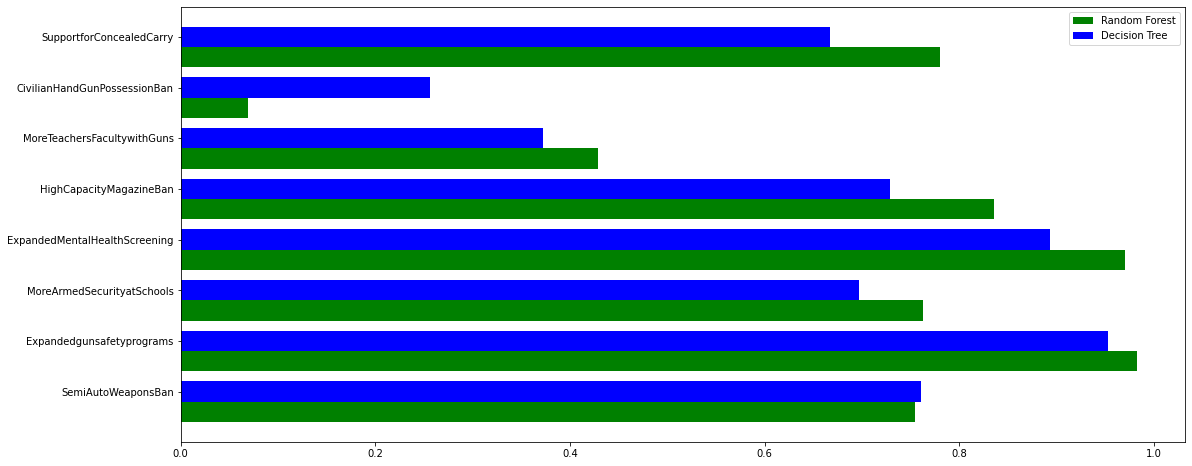

In [600]:
index = np.arange(len(DecisionRandomTestData))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,DecisionRandomTestData['Random Forest Accuracy'],0.4,color='green',label='Random Forest')
dt_feature=ax.barh(index+0.4,DecisionRandomTestData['Decision Tree Accuracy'],0.4,color='blue',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=DecisionRandomTestData['Predicted Question'])

ax.legend()
plt.show()

> All in all, we can see that in general the Random Forest model performed better than the decision tree model.

> This is to be expected since the Random Forest method creates a lot of decision trees that basically vote for the correct answer. Consequently, when there is a lot of data involved it is a better method for predictions.

> We can see that the prediction I made in the beggining of Q5 is indeed true!